In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import tensorflow as tf
if not os.path.exists("helper_functions.py"):
  !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
else:
  print("[INFO] 'helper_functions.py' already exists, skipping download.")
from helper_functions import *
# from tensorflow.keras import mixed_precision
# mixed_precision.set_global_policy('mixed_float16')
importTensorflow(memory=4000, precision=False)

[INFO] 'helper_functions.py' already exists, skipping download.
2.15.0
1 Physical GPUs, 1 Logical GPUs
<Policy "float32">


In [2]:
# download the dataset
if not os.path.exists("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv"):
    !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
else:
    print("Dataset Already Exists")

--2023-12-31 15:21:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8000::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K   400KB/s    in 0.4s    

2023-12-31 15:21:30 (400 KB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [3]:
# Import with pandas 
import pandas as pd
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", 
                 parse_dates=["Date"], 
                 index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.info(), len(df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


(None, 2787)

In [5]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


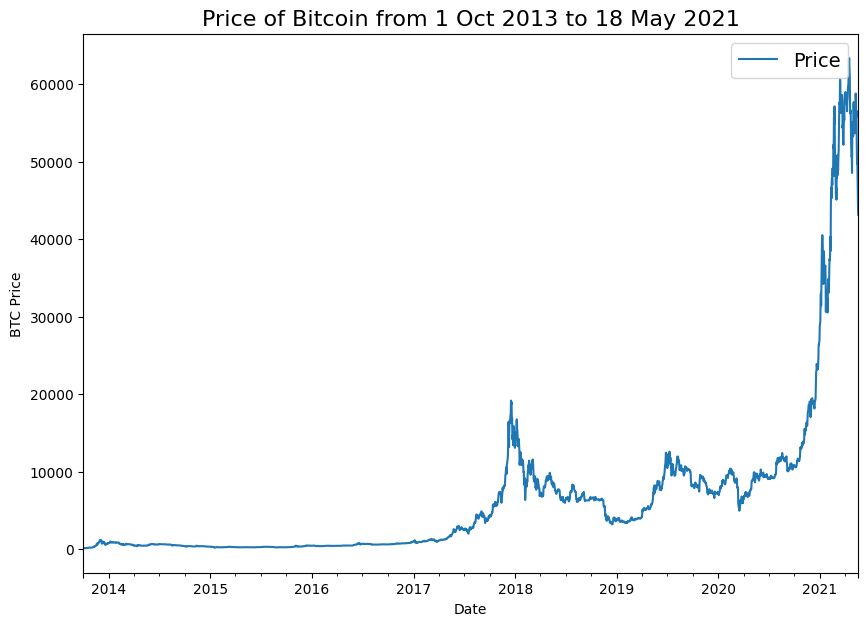

In [6]:
import matplotlib.pyplot as plt
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices.Price.to_numpy()
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [7]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
    next(csv_reader) # skip first line (this gets rid of the column titles)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
        btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

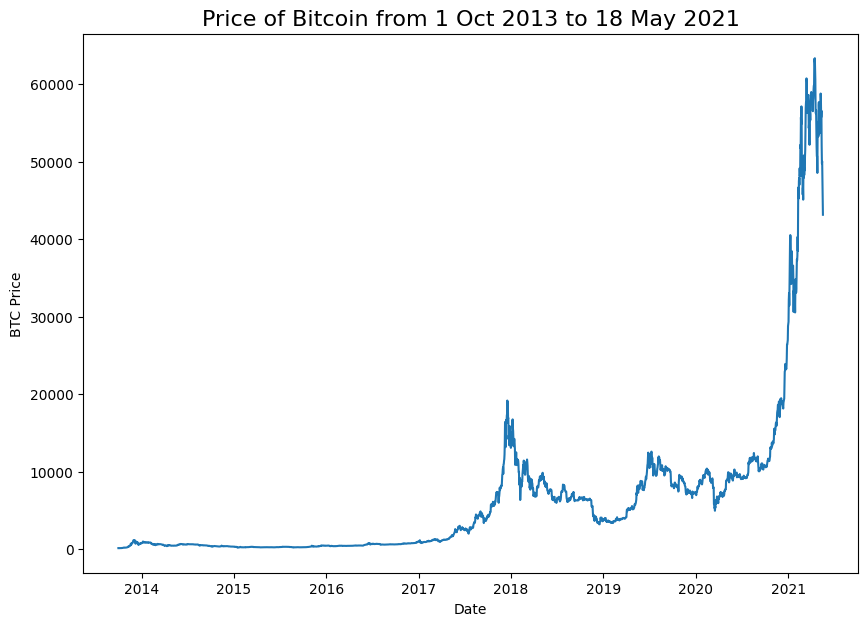

In [8]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

In [9]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

(2229,) (558,) (2229,) (558,)


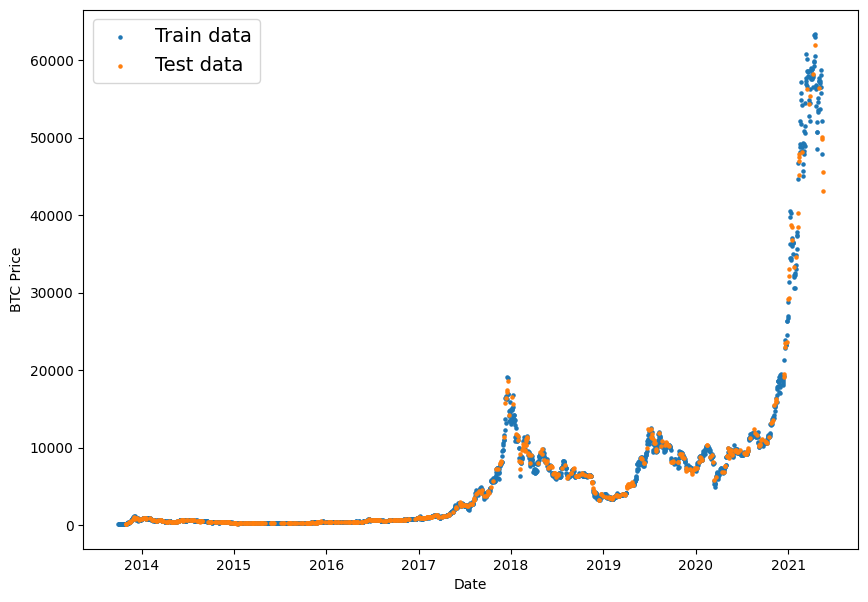

In [10]:
# creating train/test split - the wrong way
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

(2229, 558, 2229, 558)

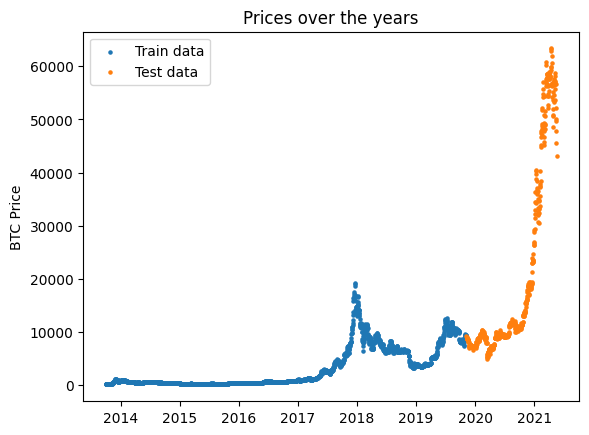

In [11]:
# Creating train/test split - the right way
split_size = int(0.8 * len(prices)) # 80% train, 20% test
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.ylabel("BTC Price")
plt.title("Prices over the years")
plt.legend()

len(X_train), len(X_test), len(y_train), len(y_test)

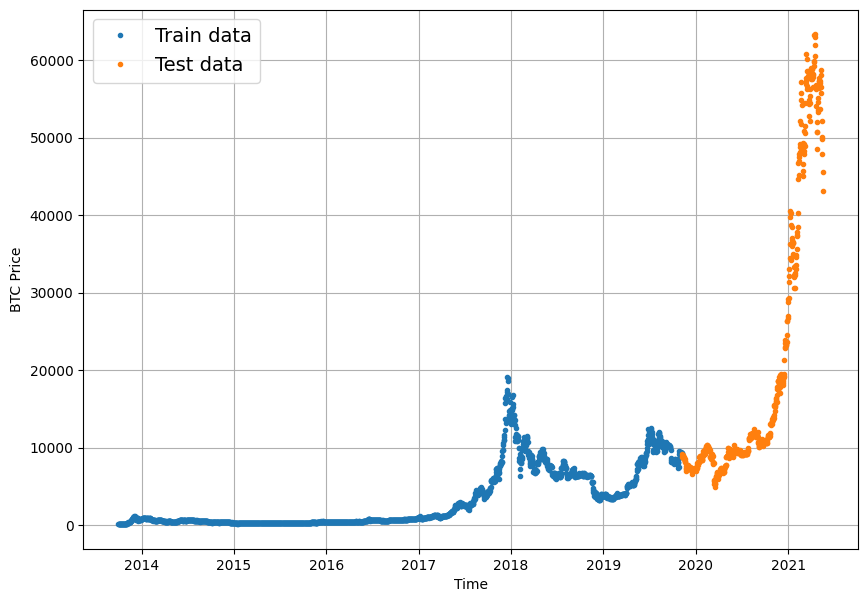

In [12]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14) # make label bigger
        plt.grid(True)

plt.figure(figsize=(10,7))
plot_time_series(X_train, y_train, label='Train data')
plot_time_series(X_test, y_test, label='Test data')

# Modelling experiments

* **horizon** - the number of timesteps to be predicted
* **window** - number of observations used to predict the horizon

0. Naive model - baseline
1. Dense model (horizon = 1, window = 7)
2. Same as model 1 (horizon = 1, window = 30)
3. Same as model 1 (horizon = 7, window = 30)
4. Conv1D
5. LSTM
6. Same as model 1 (multivariate model)
7. N-BEATS algorithm
8. Ensemble
9. Future prediction model
10. Same as model 1 (turkey data introduced)

In [13]:
# Model 0 -Naive mode;
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

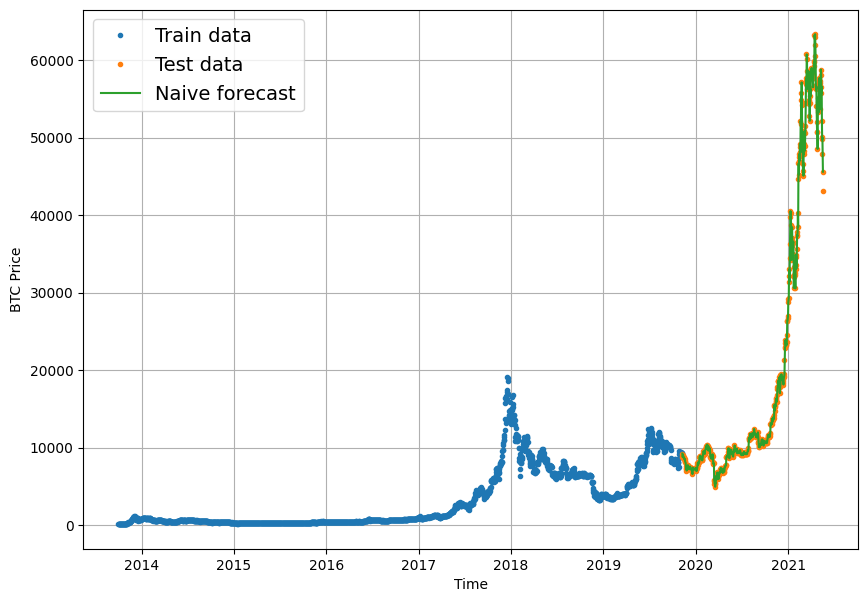

In [14]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast")

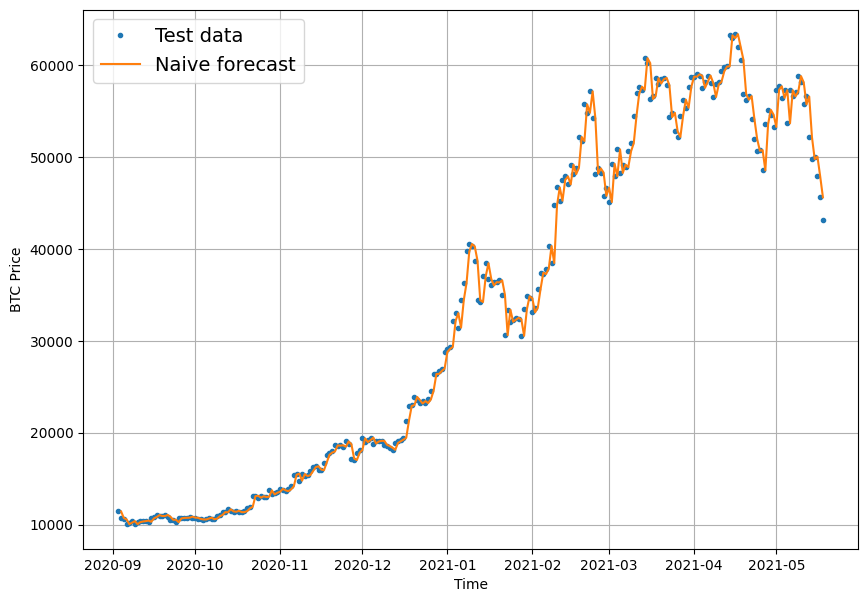

In [15]:
plt.figure(figsize=(10, 7))
offset=300
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast")

#### Evaluating time series forecasting

In [16]:
# implement MASE error - mean absolute scaled error
def mean_absolute_scaled_error(y_true, y_pred):
    '''
    No seasonality is assumed
    '''
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
    return mae / mae_naive_no_season

mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.9995699939182624

In [17]:
# Create loss function to return all loss metrics in dictionary format
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    
    return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

model_0_results = evaluate_preds(y_test[1:], naive_forecast)
model_0_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

### Format data - windowing our dataset

In [18]:
HORIZON = 1
WINDOW_SIZE = 7

def get_labelled_windows(x, horizon=HORIZON):
    return x[:,:-horizon], x[:, -horizon:]

test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [19]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
    """
    Turns a 1D array into a 2D array of sequential windows of window_size.
    """
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
    windowed_array = x[window_indexes]
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
    return windows, labels

full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [20]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


#### Use tensorflow to make it easier
**tf.keras.prrprocessing.timeseries.dataset_from_array(X)**

In [21]:
# train = tf.keras.preprocessing.timeseries_dataset_from_array(prices, targets=None, sequence_length=7)
# label = tf.keras.preprocessing.timeseries_dataset_from_array(prices, targets=None, sequence_length=1, start_index=7)
# next(iter(train))[:5], next(iter(label))[:5] 

In [22]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    """
    Splits matching pairs of windows and labels into train and test splits.
    """
    split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

# full_windows, full_labels = make_windows(prices)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(full_windows)

(2224, 556, 2780)

In [23]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [24]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [25]:
# make modelling checkpoint - because we train for longer epochs and the model experiments changes epoch to epoch
# therefore better to compare best performance(model_1) to best performance(model_2) - correct verificaation

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="10_model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

In [26]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
], name="model_1_dense") 

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

history1 = model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 13s - loss: 2768.2834 - mae: 2768.2834

I0000 00:00:1704016323.979062   12475 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 1s 29ms/step - loss: 1037.2623 - mae: 1037.2623 - val_loss: 2678.1008 - val_mae: 2678.1008
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 395.2467 - mae: 395.2467INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 16ms/step - loss: 257.3889 - mae: 257.3889 - val_loss: 1022.5935 - val_mae: 1022.5935
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 133.8649 - mae: 133.8649INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 17ms/step - loss: 176.3990 - mae: 176.3990 - val_loss: 917.3716 - val_mae: 917.3716
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 213.2415 - mae: 213.2415INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 16ms/step - loss: 167.5444 - mae: 167.5444 - val_loss: 902.5369 - val_mae: 902.5369
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 166.4758 - mae: 166.4758 - val_loss: 938.9934 - val_mae: 938.9934
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 120.0045 - mae: 120.0045INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 159.5928 - mae: 159.5928 - val_loss: 872.7252 - val_mae: 872.7252
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 190.0296 - mae: 190.0296INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 15ms/step - loss: 152.3052 - mae: 152.3052 - val_loss: 828.6837 - val_mae: 828.6837
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 117.5923 - mae: 117.5923INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 16ms/step - loss: 142.4479 - mae: 142.4479 - val_loss: 784.1815 - val_mae: 784.1815
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 124.9875 - mae: 124.9875INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 15ms/step - loss: 142.5168 - mae: 142.5168 - val_loss: 765.9551 - val_mae: 765.9551
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 142.1115 - mae: 142.1115INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 137.6666 - mae: 137.6666 - val_loss: 746.5420 - val_mae: 746.5420
Epoch 11/100
18/18 [==============================] - 0s 3ms/step - loss: 132.8737 - mae: 132.8737 - val_loss: 753.7001 - val_mae: 753.7001
Epoch 12/100
18/18 [==============================] - 0s 3ms/step - loss: 131.0594 - mae: 131.0594 - val_loss: 789.9623 - val_mae: 789.9623
Epoch 13/100
18/18 [==============================] - 0s 3ms/step - loss: 135.0789 - mae: 135.0789 - val_loss: 758.4883 - val_mae: 758.4883
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 124.5179 - mae: 124.5179INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 128.0746 - mae: 128.0746 - val_loss: 737.8233 - val_mae: 737.8233
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 125.6544 - mae: 125.6544INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 24ms/step - loss: 127.9115 - mae: 127.9115 - val_loss: 687.2060 - val_mae: 687.2060
Epoch 16/100
18/18 [==============================] - 0s 3ms/step - loss: 123.4709 - mae: 123.4709 - val_loss: 706.9865 - val_mae: 706.9865
Epoch 17/100
18/18 [==============================] - 0s 2ms/step - loss: 122.0718 - mae: 122.0718 - val_loss: 687.3295 - val_mae: 687.3295
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 134.1205 - mae: 134.1205INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 15ms/step - loss: 119.9442 - mae: 119.9442 - val_loss: 655.0959 - val_mae: 655.0959
Epoch 19/100
18/18 [==============================] - 0s 3ms/step - loss: 120.4922 - mae: 120.4922 - val_loss: 709.3076 - val_mae: 709.3076
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 133.9182 - mae: 133.9182INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 118.1318 - mae: 118.1318 - val_loss: 651.0953 - val_mae: 651.0953
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 142.4875 - mae: 142.4875INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 120.5515 - mae: 120.5515 - val_loss: 637.2396 - val_mae: 637.2396
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 169.9555 - mae: 169.9555INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 115.8111 - mae: 115.8111 - val_loss: 636.0889 - val_mae: 636.0889
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 111.6961 - mae: 111.6961INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 114.7391 - mae: 114.7391 - val_loss: 627.9748 - val_mae: 627.9748
Epoch 24/100
18/18 [==============================] - 0s 3ms/step - loss: 115.6478 - mae: 115.6478 - val_loss: 638.2546 - val_mae: 638.2546
Epoch 25/100
18/18 [==============================] - 0s 3ms/step - loss: 113.1457 - mae: 113.1457 - val_loss: 632.5999 - val_mae: 632.5999
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 111.8351 - mae: 111.8351INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 116.1325 - mae: 116.1325 - val_loss: 609.0284 - val_mae: 609.0284
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 157.1887 - mae: 157.1887INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 117.0054 - mae: 117.0054 - val_loss: 605.8533 - val_mae: 605.8533
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 99.2894 - mae: 99.2894INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 111.7739 - mae: 111.7739 - val_loss: 603.0073 - val_mae: 603.0073
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 109.1712 - mae: 109.1712INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 113.8015 - mae: 113.8015 - val_loss: 600.0084 - val_mae: 600.0084
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 126.0074 - mae: 126.0074INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 116.7775 - mae: 116.7775 - val_loss: 599.1467 - val_mae: 599.1467
Epoch 31/100
18/18 [==============================] - 0s 2ms/step - loss: 118.2769 - mae: 118.2769 - val_loss: 658.3897 - val_mae: 658.3897
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 120.0641 - mae: 120.0641INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 113.3255 - mae: 113.3255 - val_loss: 593.7842 - val_mae: 593.7842
Epoch 33/100
18/18 [==============================] - 0s 2ms/step - loss: 110.8867 - mae: 110.8867 - val_loss: 643.7862 - val_mae: 643.7862
Epoch 34/100
18/18 [==============================] - 0s 2ms/step - loss: 111.0488 - mae: 111.0488 - val_loss: 600.9137 - val_mae: 600.9137
Epoch 35/100
18/18 [==============================] - 0s 2ms/step - loss: 110.5409 - mae: 110.5409 - val_loss: 630.2741 - val_mae: 630.2741
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 159.6454 - mae: 159.6454INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 14ms/step - loss: 112.2875 - mae: 112.2875 - val_loss: 586.7615 - val_mae: 586.7615
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 129.3109 - mae: 129.3109INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 108.5448 - mae: 108.5448 - val_loss: 586.0051 - val_mae: 586.0051
Epoch 38/100
18/18 [==============================] - 0s 2ms/step - loss: 110.8380 - mae: 110.8380 - val_loss: 586.0959 - val_mae: 586.0959
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 127.0811 - mae: 127.0811INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 108.9811 - mae: 108.9811 - val_loss: 582.7193 - val_mae: 582.7193
Epoch 40/100
18/18 [==============================] - 0s 3ms/step - loss: 108.2831 - mae: 108.2831 - val_loss: 589.2833 - val_mae: 589.2833
Epoch 41/100
18/18 [==============================] - 0s 2ms/step - loss: 108.7611 - mae: 108.7611 - val_loss: 610.0011 - val_mae: 610.0011
Epoch 42/100
18/18 [==============================] - 0s 2ms/step - loss: 114.8408 - mae: 114.8408 - val_loss: 661.6389 - val_mae: 661.6389
Epoch 43/100
18/18 [==============================] - 0s 3ms/step - loss: 116.4596 - mae: 116.4596 - val_loss: 670.4594 - val_mae: 670.4594
Epoch 44/100
18/18 [==============================] - 0s 3ms/step - loss: 116.5263 - mae: 116.5263 - val_loss: 583.8235 - val_mae: 583.8235
Epoch 45/100
18/18 [==============================] - 0s 2ms/step - loss: 109.1330 - mae: 109.1330 - val_loss: 604.2845 - val_mae: 604.2845
Epoch 46/100
18/18 [============

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 107.2675 - mae: 107.2675 - val_loss: 573.8569 - val_mae: 573.8569
Epoch 55/100
18/18 [==============================] - 0s 2ms/step - loss: 111.0064 - mae: 111.0064 - val_loss: 612.9244 - val_mae: 612.9244
Epoch 56/100
18/18 [==============================] - 0s 3ms/step - loss: 114.4592 - mae: 114.4592 - val_loss: 732.7964 - val_mae: 732.7964
Epoch 57/100
18/18 [==============================] - 0s 2ms/step - loss: 123.7584 - mae: 123.7584 - val_loss: 642.9984 - val_mae: 642.9984
Epoch 58/100
18/18 [==============================] - 0s 2ms/step - loss: 117.4403 - mae: 117.4403 - val_loss: 621.1174 - val_mae: 621.1174
Epoch 59/100
18/18 [==============================] - 0s 3ms/step - loss: 110.0601 - mae: 110.0601 - val_loss: 594.9431 - val_mae: 594.9431
Epoch 60/100
18/18 [==============================] - 0s 2ms/step - loss: 111.4477 - mae: 111.4477 - val_loss: 632.2944 - val_mae: 632.2944
Epoch 61/100
 1/18 [>...........

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 109.8223 - mae: 109.8223 - val_loss: 572.1243 - val_mae: 572.1243
Epoch 62/100
18/18 [==============================] - 0s 3ms/step - loss: 107.1156 - mae: 107.1156 - val_loss: 586.9817 - val_mae: 586.9817
Epoch 63/100
18/18 [==============================] - 0s 3ms/step - loss: 111.3331 - mae: 111.3331 - val_loss: 616.3334 - val_mae: 616.3334
Epoch 64/100
18/18 [==============================] - 0s 2ms/step - loss: 110.5251 - mae: 110.5251 - val_loss: 572.7436 - val_mae: 572.7436
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 126.4865 - mae: 126.4865INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 15ms/step - loss: 107.3539 - mae: 107.3539 - val_loss: 571.5426 - val_mae: 571.5426
Epoch 66/100
18/18 [==============================] - 0s 2ms/step - loss: 106.5694 - mae: 106.5694 - val_loss: 580.7114 - val_mae: 580.7114
Epoch 67/100
18/18 [==============================] - 0s 3ms/step - loss: 106.8308 - mae: 106.8308 - val_loss: 662.6316 - val_mae: 662.6316
Epoch 68/100
18/18 [==============================] - 0s 2ms/step - loss: 106.2690 - mae: 106.2690 - val_loss: 579.6061 - val_mae: 579.6061
Epoch 69/100
18/18 [==============================] - 0s 2ms/step - loss: 107.9353 - mae: 107.9353 - val_loss: 656.0020 - val_mae: 656.0020
Epoch 70/100
18/18 [==============================] - 0s 2ms/step - loss: 115.8844 - mae: 115.8844 - val_loss: 615.9242 - val_mae: 615.9242
Epoch 71/100
 1/18 [>.............................] - ETA: 0s - loss: 91.6452 - mae: 91.6452INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 12ms/step - loss: 108.0176 - mae: 108.0176 - val_loss: 570.6374 - val_mae: 570.6374
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 94.5855 - mae: 94.5855INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 21ms/step - loss: 110.3904 - mae: 110.3904 - val_loss: 570.5986 - val_mae: 570.5986
Epoch 73/100
18/18 [==============================] - 0s 3ms/step - loss: 111.5379 - mae: 111.5379 - val_loss: 582.9429 - val_mae: 582.9429
Epoch 74/100
18/18 [==============================] - 0s 2ms/step - loss: 107.6185 - mae: 107.6185 - val_loss: 581.6252 - val_mae: 581.6252
Epoch 75/100
18/18 [==============================] - 0s 2ms/step - loss: 110.2107 - mae: 110.2107 - val_loss: 577.5940 - val_mae: 577.5940
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 74.2353 - mae: 74.2353INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 110.9681 - mae: 110.9681 - val_loss: 568.9363 - val_mae: 568.9363
Epoch 77/100
18/18 [==============================] - 0s 2ms/step - loss: 106.4146 - mae: 106.4146 - val_loss: 570.0948 - val_mae: 570.0948
Epoch 78/100
18/18 [==============================] - 0s 2ms/step - loss: 109.5774 - mae: 109.5774 - val_loss: 613.0911 - val_mae: 613.0911
Epoch 79/100
18/18 [==============================] - 0s 3ms/step - loss: 111.1666 - mae: 111.1666 - val_loss: 574.7644 - val_mae: 574.7644
Epoch 80/100
18/18 [==============================] - 0s 2ms/step - loss: 106.8852 - mae: 106.8852 - val_loss: 592.2198 - val_mae: 592.2198
Epoch 81/100
18/18 [==============================] - 0s 2ms/step - loss: 105.9126 - mae: 105.9126 - val_loss: 574.0067 - val_mae: 574.0067
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 187.6481 - mae: 187.6481INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 12ms/step - loss: 117.1064 - mae: 117.1064 - val_loss: 567.8090 - val_mae: 567.8090
Epoch 83/100
18/18 [==============================] - 0s 2ms/step - loss: 113.8036 - mae: 113.8036 - val_loss: 675.8536 - val_mae: 675.8536
Epoch 84/100
18/18 [==============================] - 0s 2ms/step - loss: 113.6854 - mae: 113.6854 - val_loss: 590.5784 - val_mae: 590.5784
Epoch 85/100
18/18 [==============================] - 0s 2ms/step - loss: 107.8573 - mae: 107.8573 - val_loss: 575.5191 - val_mae: 575.5191
Epoch 86/100
18/18 [==============================] - 0s 2ms/step - loss: 106.2833 - mae: 106.2833 - val_loss: 580.1614 - val_mae: 580.1614
Epoch 87/100
18/18 [==============================] - 0s 2ms/step - loss: 105.6006 - mae: 105.6006 - val_loss: 604.7892 - val_mae: 604.7892
Epoch 88/100
18/18 [==============================] - 0s 2ms/step - loss: 109.9255 - mae: 109.9255 - val_loss: 568.0328 - val_mae: 568.0328
Epoch 89/100
18/18 [============

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 13ms/step - loss: 110.2580 - mae: 110.2580 - val_loss: 567.2601 - val_mae: 567.2601
Epoch 93/100
18/18 [==============================] - 0s 2ms/step - loss: 115.2695 - mae: 115.2695 - val_loss: 621.8893 - val_mae: 621.8893
Epoch 94/100
18/18 [==============================] - 0s 2ms/step - loss: 111.6638 - mae: 111.6638 - val_loss: 585.0021 - val_mae: 585.0021
Epoch 95/100
18/18 [==============================] - 0s 3ms/step - loss: 106.2851 - mae: 106.2851 - val_loss: 570.2156 - val_mae: 570.2156
Epoch 96/100
18/18 [==============================] - 0s 2ms/step - loss: 106.2798 - mae: 106.2798 - val_loss: 567.6553 - val_mae: 567.6553
Epoch 97/100
 1/18 [>.............................] - ETA: 0s - loss: 97.2136 - mae: 97.2136INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020484e20>, 140669311267904), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02044db20>, 140669902729584), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff020446be0>, 140669311154416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0204b20d0>, 140669311154736), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_dense/assets


18/18 [==============================] - 0s 12ms/step - loss: 105.6707 - mae: 105.6707 - val_loss: 567.1581 - val_mae: 567.1581
Epoch 98/100
18/18 [==============================] - 0s 3ms/step - loss: 106.0347 - mae: 106.0347 - val_loss: 569.3281 - val_mae: 569.3281
Epoch 99/100
18/18 [==============================] - 0s 2ms/step - loss: 109.9381 - mae: 109.9381 - val_loss: 572.7797 - val_mae: 572.7797
Epoch 100/100
18/18 [==============================] - 0s 2ms/step - loss: 114.8061 - mae: 114.8061 - val_loss: 725.6069 - val_mae: 725.6069


In [27]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 725.6069 - mae: 725.6069


[725.6068725585938, 725.6068725585938]

In [28]:
# load in the saved best performaing model
model_1 = tf.keras.models.load_model('10_model_experiments/model_1_dense/')
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 930us/step - loss: 567.1580 - mae: 567.1580


[567.1580200195312, 567.1580200195312]

In [29]:
# make forecast with the model (on the test dataset)
def make_preds(model, data):
    return tf.squeeze(model.predict(data))

# use it on model_1
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:10]

18/18 [==============================] - 0s 698us/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8850.424, 8765.775, 9048.212, 8796.996, 8725.211, 8749.288,
       8686.932, 8510.637, 8465.126, 8530.002], dtype=float32)>

In [30]:
model_1_results = evaluate_preds(tf.squeeze(test_labels),
                                   model_1_preds)
model_1_results, model_0_results

({'mae': 567.158,
  'mse': 1163890.0,
  'rmse': 1078.8373,
  'mape': 2.5283296,
  'mase': 0.99633956},
 {'mae': 567.9802,
  'mse': 1147547.0,
  'rmse': 1071.2362,
  'mape': 2.516525,
  'mase': 0.99957})

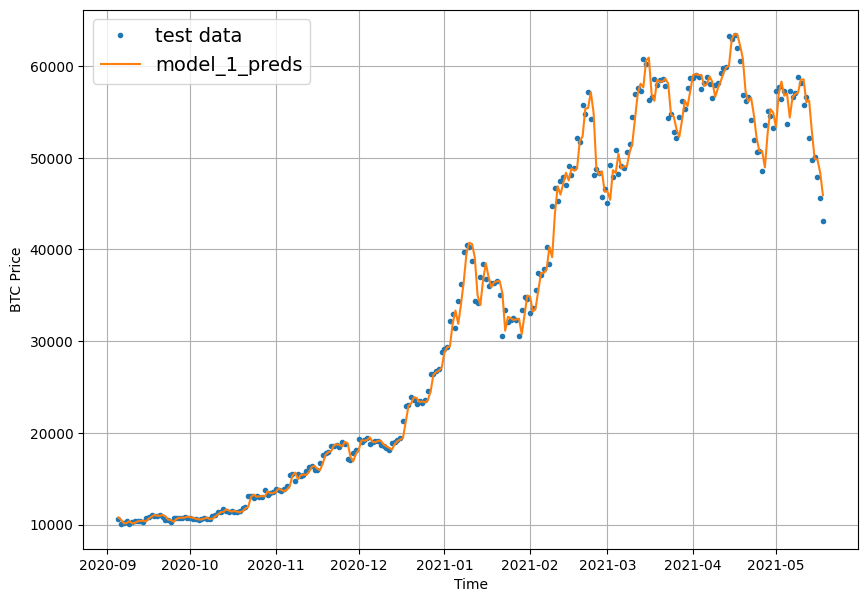

In [31]:
plt.figure(figsize=(10,7))
plot_time_series(X_test[-len(test_windows):], 
                 test_labels[:, 0], 
                 start=300, 
                 label='test data')
plot_time_series(X_test[-len(test_windows):], 
                 model_1_preds, 
                 start=300, 
                 format='-',
                 label='model_1_preds')


In [32]:
# Model 2 - model_1 with window_size=30 and horizon=1
full_windows_30_1, full_labels_30_1 = make_windows(prices, window_size=30, horizon=1)
train_windows_30_1, test_windows_30_1, train_labels_30_1, test_labels_30_1 = make_train_test_splits(full_windows_30_1, full_labels_30_1)

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(HORIZON)
], name='model_2_dense_30_1')
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())
history_2 = model_2.fit(train_windows_30_1, train_labels_30_1,
                        epochs=100,
                        batch_size=128,
                        validation_data=(test_windows_30_1, test_labels_30_1),
                        callbacks=create_model_checkpoint(model_2.name))

Epoch 1/100
 1/18 [>.............................] - ETA: 6s - loss: 936.5249INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 1s 16ms/step - loss: 412.2697 - val_loss: 1530.1886
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 302.6482INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 256.9455 - val_loss: 1238.1830
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 214.1054INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 214.5588 - val_loss: 1040.3167
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 194.4047 - val_loss: 1208.4526
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 210.0489INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 191.8878 - val_loss: 970.4272
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 197.2952 - val_loss: 1626.7805
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 325.7363INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 213.7915 - val_loss: 878.1475
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 164.1042 - val_loss: 971.4392
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 188.4676INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 167.8724 - val_loss: 850.1793
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 158.9818 - val_loss: 866.1075
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 192.9001INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 159.5367 - val_loss: 809.0283
Epoch 12/100
18/18 [==============================] - 0s 3ms/step - loss: 148.2331 - val_loss: 832.5273
Epoch 13/100
18/18 [==============================] - 0s 2ms/step - loss: 143.9144 - val_loss: 834.8998
Epoch 14/100
18/18 [==============================] - 0s 3ms/step - loss: 149.0357 - val_loss: 884.1304
Epoch 15/100
18/18 [==============================] - 0s 4ms/step - loss: 141.8575 - val_loss: 810.1838
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 152.1627INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 157.8271 - val_loss: 748.3620
Epoch 17/100
18/18 [==============================] - 0s 3ms/step - loss: 143.4323 - val_loss: 888.4113
Epoch 18/100
18/18 [==============================] - 0s 3ms/step - loss: 144.2398 - val_loss: 933.5832
Epoch 19/100
18/18 [==============================] - 0s 3ms/step - loss: 145.9936 - val_loss: 1051.1517
Epoch 20/100
18/18 [==============================] - 0s 3ms/step - loss: 149.8084 - val_loss: 753.8052
Epoch 21/100
18/18 [==============================] - 0s 3ms/step - loss: 137.9003 - val_loss: 1297.8414
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 197.0455INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 187.9451 - val_loss: 731.8480
Epoch 23/100
18/18 [==============================] - 0s 3ms/step - loss: 142.2708 - val_loss: 874.0675
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 157.9835INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 132.2344 - val_loss: 696.3947
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 133.2760INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 139.4818 - val_loss: 694.9880
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 107.9357INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 132.3376 - val_loss: 674.1252
Epoch 27/100
18/18 [==============================] - 0s 2ms/step - loss: 127.1359 - val_loss: 1068.1998
Epoch 28/100
18/18 [==============================] - 0s 2ms/step - loss: 143.3206 - val_loss: 867.0236
Epoch 29/100
18/18 [==============================] - 0s 3ms/step - loss: 150.2720 - val_loss: 769.7139
Epoch 30/100
18/18 [==============================] - 0s 2ms/step - loss: 139.3665 - val_loss: 760.7491
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 133.4596INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 156.9442 - val_loss: 656.2594
Epoch 32/100
18/18 [==============================] - 0s 3ms/step - loss: 126.5919 - val_loss: 760.6606
Epoch 33/100
18/18 [==============================] - 0s 2ms/step - loss: 132.7186 - val_loss: 698.7664
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 142.0899INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 20ms/step - loss: 126.0135 - val_loss: 651.4355
Epoch 35/100
18/18 [==============================] - 0s 3ms/step - loss: 124.8449 - val_loss: 678.4056
Epoch 36/100
18/18 [==============================] - 0s 2ms/step - loss: 132.5987 - val_loss: 752.6347
Epoch 37/100
18/18 [==============================] - 0s 2ms/step - loss: 141.3568 - val_loss: 890.5070
Epoch 38/100
18/18 [==============================] - 0s 2ms/step - loss: 145.1027 - val_loss: 655.8502
Epoch 39/100
18/18 [==============================] - 0s 2ms/step - loss: 123.0841 - val_loss: 655.1309
Epoch 40/100
18/18 [==============================] - 0s 3ms/step - loss: 119.0894 - val_loss: 702.6748
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 106.2178INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 126.9937 - val_loss: 641.3726
Epoch 42/100
18/18 [==============================] - 0s 2ms/step - loss: 127.0678 - val_loss: 752.6451
Epoch 43/100
18/18 [==============================] - 0s 2ms/step - loss: 125.0141 - val_loss: 642.1658
Epoch 44/100
18/18 [==============================] - 0s 2ms/step - loss: 137.9555 - val_loss: 726.1798
Epoch 45/100
18/18 [==============================] - 0s 3ms/step - loss: 122.1340 - val_loss: 653.0505
Epoch 46/100
18/18 [==============================] - 0s 2ms/step - loss: 121.2854 - val_loss: 747.4804
Epoch 47/100
18/18 [==============================] - 0s 2ms/step - loss: 122.8133 - val_loss: 685.2542
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 81.1434INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 1

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 120.8001 - val_loss: 632.0164
Epoch 49/100
18/18 [==============================] - 0s 2ms/step - loss: 119.4283 - val_loss: 677.6825
Epoch 50/100
18/18 [==============================] - 0s 2ms/step - loss: 144.3311 - val_loss: 780.0532
Epoch 51/100
18/18 [==============================] - 0s 2ms/step - loss: 121.2140 - val_loss: 724.8563
Epoch 52/100
18/18 [==============================] - 0s 2ms/step - loss: 125.6545 - val_loss: 728.0291
Epoch 53/100
18/18 [==============================] - 0s 2ms/step - loss: 147.4789 - val_loss: 641.1707
Epoch 54/100
18/18 [==============================] - 0s 2ms/step - loss: 121.5777 - val_loss: 916.0983
Epoch 55/100
18/18 [==============================] - 0s 3ms/step - loss: 129.4971 - val_loss: 764.8681
Epoch 56/100
 1/18 [>.............................] - ETA: 0s - loss: 147.6591INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float3

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 116.8733 - val_loss: 627.8276
Epoch 57/100
18/18 [==============================] - 0s 2ms/step - loss: 116.3613 - val_loss: 748.1660
Epoch 58/100
18/18 [==============================] - 0s 2ms/step - loss: 119.8526 - val_loss: 922.3636
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 159.4170INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 164.0056 - val_loss: 617.5249
Epoch 60/100
18/18 [==============================] - 0s 2ms/step - loss: 115.8854 - val_loss: 657.2525
Epoch 61/100
18/18 [==============================] - 0s 2ms/step - loss: 129.3171 - val_loss: 683.3954
Epoch 62/100
18/18 [==============================] - 0s 2ms/step - loss: 116.0056 - val_loss: 715.0059
Epoch 63/100
18/18 [==============================] - 0s 2ms/step - loss: 140.2189 - val_loss: 631.1262
Epoch 64/100
18/18 [==============================] - 0s 2ms/step - loss: 119.1965 - val_loss: 693.5887
Epoch 65/100
18/18 [==============================] - 0s 3ms/step - loss: 133.6252 - val_loss: 730.9049
Epoch 66/100
18/18 [==============================] - 0s 2ms/step - loss: 124.9212 - val_loss: 700.3697
Epoch 67/100
18/18 [==============================] - 0s 2ms/step - loss: 115.6816 - val_loss: 620.1976
Epoch 68/100
 1/18 [>.............................] - ETA: 0s - loss: 82.819

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 115.8188 - val_loss: 609.6555
Epoch 69/100
18/18 [==============================] - 0s 2ms/step - loss: 112.5418 - val_loss: 762.9904
Epoch 70/100
18/18 [==============================] - 0s 2ms/step - loss: 123.2145 - val_loss: 945.5600
Epoch 71/100
18/18 [==============================] - 0s 2ms/step - loss: 121.7227 - val_loss: 781.4536
Epoch 72/100
18/18 [==============================] - 0s 3ms/step - loss: 124.0512 - val_loss: 610.9453
Epoch 73/100
18/18 [==============================] - 0s 2ms/step - loss: 118.1785 - val_loss: 723.4688
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 155.3930INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 126.4868 - val_loss: 606.8905
Epoch 75/100
18/18 [==============================] - 0s 3ms/step - loss: 118.6671 - val_loss: 669.2021
Epoch 76/100
18/18 [==============================] - 0s 2ms/step - loss: 112.0932 - val_loss: 615.2109
Epoch 77/100
18/18 [==============================] - 0s 2ms/step - loss: 123.6782 - val_loss: 706.6729
Epoch 78/100
18/18 [==============================] - 0s 2ms/step - loss: 135.0679 - val_loss: 612.6246
Epoch 79/100
 1/18 [>.............................] - ETA: 0s - loss: 120.9675INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 113.5116 - val_loss: 599.0328
Epoch 80/100
18/18 [==============================] - 0s 2ms/step - loss: 120.8628 - val_loss: 686.0937
Epoch 81/100
18/18 [==============================] - 0s 2ms/step - loss: 120.6435 - val_loss: 621.5616
Epoch 82/100
18/18 [==============================] - 0s 2ms/step - loss: 111.2692 - val_loss: 640.0790
Epoch 83/100
18/18 [==============================] - 0s 2ms/step - loss: 129.4685 - val_loss: 704.8539
Epoch 84/100
18/18 [==============================] - 0s 2ms/step - loss: 127.2863 - val_loss: 1009.2467
Epoch 85/100
18/18 [==============================] - 0s 3ms/step - loss: 138.2728 - val_loss: 871.4254
Epoch 86/100
18/18 [==============================] - 0s 2ms/step - loss: 128.8411 - val_loss: 601.8215
Epoch 87/100
18/18 [==============================] - 0s 2ms/step - loss: 123.1794 - val_loss: 702.6722
Epoch 88/100
18/18 [==============================] - 0s 2ms/step - loss: 1

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff02035c8b0>, 140669308268016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff040298c10>, 140669308267456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0402ceeb0>, 140669308268176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff04392fb50>, 140669308265776), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_2_dense_30_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 115.5333 - val_loss: 596.9396


In [33]:
model_2.evaluate(test_windows_30_1, test_labels_30_1)

18/18 [==============================] - 0s 729us/step - loss: 596.9395


596.9395141601562

In [34]:
model_2 = tf.keras.models.load_model("10_model_experiments/model_2_dense_30_1/")
model_2.evaluate(test_windows_30_1, test_labels_30_1)

18/18 [==============================] - 0s 917us/step - loss: 596.9395


596.9395141601562

In [35]:
model_2_preds = make_preds(model_2, test_windows_30_1)
model_2_results = evaluate_preds(tf.squeeze(test_labels_30_1), model_2_preds)
model_2_results

18/18 [==============================] - 0s 671us/step


{'mae': 596.9395,
 'mse': 1250915.8,
 'rmse': 1118.4435,
 'mape': 2.6891832,
 'mase': 1.0434562}

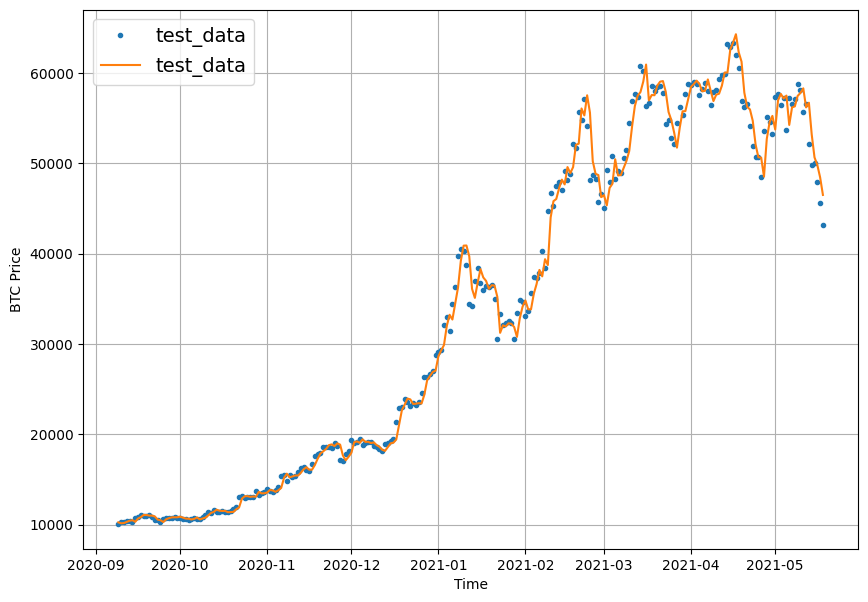

In [36]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(X_test[-len(test_windows_30_1):], test_labels_30_1[:, 0], start=offset, label='test_data')
plot_time_series(X_test[-len(test_windows_30_1):], model_2_preds, start=offset, format='-', label='test_data')

In [37]:
# Model 3 - model_1(window=30, horizon=7)
full_windows_30_7, full_labels_30_7 = make_windows(prices, window_size=30, horizon=7)
train_windows_30_7, test_windows_30_7, train_labels_30_7, test_labels_30_7 = make_train_test_splits(full_windows_30_7,
                                                                                                  full_labels_30_7)

tf.random.set_seed(42)
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(7, activation=tf.keras.activations.linear)
], name='model_3_dense_30_7')
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae','mse'])
history_3 = model_3.fit(train_windows_30_7, train_labels_30_7,
                        epochs=100,
                        batch_size=128,
                        validation_data=(test_windows_30_7, test_labels_30_7),
                        callbacks=create_model_checkpoint(model_3.name))

Epoch 1/100
 1/18 [>.............................] - ETA: 7s - loss: 4142.8198 - mae: 4142.8198 - mse: 48577896.0000INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 1s 20ms/step - loss: 1898.6979 - mae: 1898.6979 - mse: 15284288.0000 - val_loss: 2645.9688 - val_mae: 2645.9688 - val_mse: 18266398.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 450.4184 - mae: 450.4184 - mse: 754217.8125INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 14ms/step - loss: 534.2401 - mae: 534.2401 - mse: 1331423.7500 - val_loss: 2600.0376 - val_mae: 2600.0376 - val_mse: 19373778.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 413.3456 - mae: 413.3456 - mse: 624351.8750INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 14ms/step - loss: 416.4153 - mae: 416.4153 - mse: 851729.1875 - val_loss: 1987.9363 - val_mae: 1987.9363 - val_mse: 11680753.0000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 436.5640 - mae: 436.5640 - mse: 961809.2500INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 13ms/step - loss: 378.3810 - mae: 378.3810 - mse: 721504.4375 - val_loss: 1881.9651 - val_mae: 1881.9651 - val_mse: 10827996.0000
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 355.5171 - mae: 355.5171 - mse: 646785.7500 - val_loss: 2097.5369 - val_mae: 2097.5369 - val_mse: 12705883.0000
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 310.6158 - mae: 310.6158 - mse: 414329.0000INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 13ms/step - loss: 343.2346 - mae: 343.2346 - mse: 594513.8125 - val_loss: 1786.9674 - val_mae: 1786.9674 - val_mse: 9912909.0000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 295.9206 - mae: 295.9206 - mse: 488888.6250INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 13ms/step - loss: 324.4602 - mae: 324.4602 - mse: 538980.4375 - val_loss: 1596.7876 - val_mae: 1596.7876 - val_mse: 8252410.5000
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 319.0728 - mae: 319.0728 - mse: 509059.9062 - val_loss: 1625.7384 - val_mae: 1625.7384 - val_mse: 8423969.0000
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 307.9126 - mae: 307.9126 - mse: 475011.8438 - val_loss: 1814.1903 - val_mae: 1814.1903 - val_mse: 9457587.0000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 263.6586 - mae: 263.6586 - mse: 299611.8438INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 13ms/step - loss: 307.7485 - mae: 307.7485 - mse: 461702.5000 - val_loss: 1522.7466 - val_mae: 1522.7466 - val_mse: 7473838.0000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 303.4525 - mae: 303.4525 - mse: 485096.5938INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 15ms/step - loss: 298.1500 - mae: 298.1500 - mse: 438726.7500 - val_loss: 1478.4153 - val_mae: 1478.4153 - val_mse: 7148476.5000
Epoch 12/100
18/18 [==============================] - 0s 3ms/step - loss: 284.3897 - mae: 284.3897 - mse: 413604.7500 - val_loss: 1622.2382 - val_mae: 1622.2382 - val_mse: 8033161.0000
Epoch 13/100
18/18 [==============================] - 0s 3ms/step - loss: 280.9202 - mae: 280.9202 - mse: 399151.8125 - val_loss: 1491.2559 - val_mae: 1491.2559 - val_mse: 7176613.0000
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 260.1342 - mae: 260.1342 - mse: 306233.5000INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 13ms/step - loss: 277.9135 - mae: 277.9135 - mse: 395187.1562 - val_loss: 1454.7451 - val_mae: 1454.7451 - val_mse: 6962402.5000
Epoch 15/100
18/18 [==============================] - 0s 2ms/step - loss: 276.6356 - mae: 276.6356 - mse: 389806.2500 - val_loss: 1675.3451 - val_mae: 1675.3451 - val_mse: 8132820.0000
Epoch 16/100
18/18 [==============================] - 0s 2ms/step - loss: 273.8530 - mae: 273.8530 - mse: 380932.2812 - val_loss: 1469.5404 - val_mae: 1469.5404 - val_mse: 6882299.5000
Epoch 17/100
18/18 [==============================] - 0s 3ms/step - loss: 268.2874 - mae: 268.2874 - mse: 370796.0312 - val_loss: 1566.1146 - val_mae: 1566.1146 - val_mse: 7468691.0000
Epoch 18/100
18/18 [==============================] - 0s 3ms/step - loss: 269.0279 - mae: 269.0279 - mse: 367770.0938 - val_loss: 1677.8822 - val_mae: 1677.8822 - val_mse: 8127429.5000
Epoch 19/100
18/18 [==============================] - 0s 2ms/step - loss: 269.3768 - ma

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 13ms/step - loss: 269.5382 - mae: 269.5382 - mse: 366210.5625 - val_loss: 1411.3004 - val_mae: 1411.3004 - val_mse: 6566674.5000
Epoch 21/100
18/18 [==============================] - 0s 3ms/step - loss: 261.4286 - mae: 261.4286 - mse: 351088.4688 - val_loss: 1467.2881 - val_mae: 1467.2881 - val_mse: 6813071.5000
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 335.2014 - mae: 335.2014 - mse: 485879.8750INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 22ms/step - loss: 258.2049 - mae: 258.2049 - mse: 344407.9375 - val_loss: 1382.1957 - val_mae: 1382.1957 - val_mse: 6363524.0000
Epoch 23/100
18/18 [==============================] - 0s 3ms/step - loss: 260.4351 - mae: 260.4351 - mse: 348592.8750 - val_loss: 1384.7609 - val_mae: 1384.7609 - val_mse: 6432325.5000
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 309.8911 - mae: 309.8911 - mse: 474735.9375INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 14ms/step - loss: 273.0950 - mae: 273.0950 - mse: 371624.5625 - val_loss: 1357.7063 - val_mae: 1357.7063 - val_mse: 6246436.0000
Epoch 25/100
18/18 [==============================] - 0s 3ms/step - loss: 259.2333 - mae: 259.2333 - mse: 342935.8125 - val_loss: 1570.5920 - val_mae: 1570.5920 - val_mse: 7528537.5000
Epoch 26/100
18/18 [==============================] - 0s 3ms/step - loss: 257.7766 - mae: 257.7766 - mse: 342134.9375 - val_loss: 1446.9193 - val_mae: 1446.9193 - val_mse: 6709085.0000
Epoch 27/100
18/18 [==============================] - 0s 2ms/step - loss: 254.3011 - mae: 254.3011 - mse: 337301.3750 - val_loss: 1391.5325 - val_mae: 1391.5325 - val_mse: 6309292.0000
Epoch 28/100
18/18 [==============================] - 0s 3ms/step - loss: 251.1575 - mae: 251.1575 - mse: 329686.1562 - val_loss: 1385.3484 - val_mae: 1385.3484 - val_mse: 6276299.0000
Epoch 29/100
18/18 [==============================] - 0s 3ms/step - loss: 253.0557 - ma

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 14ms/step - loss: 247.1355 - mae: 247.1355 - mse: 319342.1875 - val_loss: 1332.6198 - val_mae: 1332.6198 - val_mse: 6036893.5000
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 234.0215 - mae: 234.0215 - mse: 224136.0469INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 13ms/step - loss: 245.9600 - mae: 245.9600 - mse: 321318.8750 - val_loss: 1319.0056 - val_mae: 1319.0056 - val_mse: 5973779.0000
Epoch 33/100
18/18 [==============================] - 0s 3ms/step - loss: 246.6302 - mae: 246.6302 - mse: 321263.3750 - val_loss: 1359.9603 - val_mae: 1359.9603 - val_mse: 6180622.0000
Epoch 34/100
18/18 [==============================] - 0s 3ms/step - loss: 245.0970 - mae: 245.0970 - mse: 319395.9375 - val_loss: 1377.4701 - val_mae: 1377.4701 - val_mse: 6218442.5000
Epoch 35/100
18/18 [==============================] - 0s 3ms/step - loss: 245.8420 - mae: 245.8420 - mse: 319047.3750 - val_loss: 1391.5685 - val_mae: 1391.5685 - val_mse: 6335874.5000
Epoch 36/100
18/18 [==============================] - 0s 3ms/step - loss: 245.4840 - mae: 245.4840 - mse: 322530.6562 - val_loss: 1371.4456 - val_mae: 1371.4456 - val_mse: 6283365.5000
Epoch 37/100
18/18 [==============================] - 0s 3ms/step - loss: 257.5504 - ma

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 13ms/step - loss: 238.5545 - mae: 238.5545 - mse: 302595.1250 - val_loss: 1311.0339 - val_mae: 1311.0339 - val_mse: 5847196.0000
Epoch 44/100
18/18 [==============================] - 0s 3ms/step - loss: 242.3104 - mae: 242.3104 - mse: 309823.5938 - val_loss: 1333.8341 - val_mae: 1333.8341 - val_mse: 5963419.0000
Epoch 45/100
18/18 [==============================] - 0s 3ms/step - loss: 240.6936 - mae: 240.6936 - mse: 307320.3125 - val_loss: 1395.7190 - val_mae: 1395.7190 - val_mse: 6166163.0000
Epoch 46/100
18/18 [==============================] - 0s 2ms/step - loss: 240.0635 - mae: 240.0635 - mse: 306601.2188 - val_loss: 1332.9170 - val_mae: 1332.9170 - val_mse: 5975876.5000
Epoch 47/100
18/18 [==============================] - 0s 3ms/step - loss: 239.6411 - mae: 239.6411 - mse: 305186.4688 - val_loss: 1337.8108 - val_mae: 1337.8108 - val_mse: 5887175.0000
Epoch 48/100
 1/18 [>.............................] - ETA: 0s - loss: 260.3495 - mae: 2

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 13ms/step - loss: 241.9119 - mae: 241.9119 - mse: 305333.5625 - val_loss: 1284.4617 - val_mae: 1284.4617 - val_mse: 5675845.0000
Epoch 49/100
18/18 [==============================] - 0s 3ms/step - loss: 247.1668 - mae: 247.1668 - mse: 311494.0000 - val_loss: 1393.1108 - val_mae: 1393.1108 - val_mse: 6364525.0000
Epoch 50/100
18/18 [==============================] - 0s 3ms/step - loss: 241.3504 - mae: 241.3504 - mse: 305321.9688 - val_loss: 1316.6432 - val_mae: 1316.6432 - val_mse: 5806271.5000
Epoch 51/100
18/18 [==============================] - 0s 3ms/step - loss: 238.3309 - mae: 238.3309 - mse: 297693.8750 - val_loss: 1377.1608 - val_mae: 1377.1608 - val_mse: 6119613.5000
Epoch 52/100
18/18 [==============================] - 0s 3ms/step - loss: 235.1786 - mae: 235.1786 - mse: 296332.2812 - val_loss: 1306.4904 - val_mae: 1306.4904 - val_mse: 5713660.0000
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 172.0238 - mae: 1

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 13ms/step - loss: 234.3016 - mae: 234.3016 - mse: 295047.5000 - val_loss: 1273.6068 - val_mae: 1273.6068 - val_mse: 5626718.5000
Epoch 54/100
18/18 [==============================] - 0s 2ms/step - loss: 235.3820 - mae: 235.3820 - mse: 296411.0938 - val_loss: 1287.3754 - val_mae: 1287.3754 - val_mse: 5712147.5000
Epoch 55/100
18/18 [==============================] - 0s 2ms/step - loss: 235.7302 - mae: 235.7302 - mse: 291285.6875 - val_loss: 1324.0565 - val_mae: 1324.0565 - val_mse: 5784778.5000
Epoch 56/100
18/18 [==============================] - 0s 3ms/step - loss: 236.3681 - mae: 236.3681 - mse: 297789.7188 - val_loss: 1292.6274 - val_mae: 1292.6274 - val_mse: 5628088.0000
Epoch 57/100
18/18 [==============================] - 0s 3ms/step - loss: 235.9907 - mae: 235.9907 - mse: 296095.9375 - val_loss: 1377.9149 - val_mae: 1377.9149 - val_mse: 6093544.5000
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 234.6113 - mae: 2

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 13ms/step - loss: 235.1588 - mae: 235.1588 - mse: 293575.2812 - val_loss: 1259.7274 - val_mae: 1259.7274 - val_mse: 5526395.0000
Epoch 59/100
18/18 [==============================] - 0s 3ms/step - loss: 234.7958 - mae: 234.7958 - mse: 295229.3125 - val_loss: 1304.5769 - val_mae: 1304.5769 - val_mse: 5663768.0000
Epoch 60/100
18/18 [==============================] - 0s 3ms/step - loss: 231.8715 - mae: 231.8715 - mse: 290313.0625 - val_loss: 1264.4348 - val_mae: 1264.4348 - val_mse: 5605219.0000
Epoch 61/100
18/18 [==============================] - 0s 3ms/step - loss: 231.8391 - mae: 231.8391 - mse: 290271.3438 - val_loss: 1387.7441 - val_mae: 1387.7441 - val_mse: 6074179.5000
Epoch 62/100
18/18 [==============================] - 0s 3ms/step - loss: 235.6670 - mae: 235.6670 - mse: 291806.3125 - val_loss: 1284.2133 - val_mae: 1284.2133 - val_mse: 5696639.5000
Epoch 63/100
18/18 [==============================] - 0s 2ms/step - loss: 238.3774 - ma

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 13ms/step - loss: 235.2810 - mae: 235.2810 - mse: 289459.5000 - val_loss: 1257.4821 - val_mae: 1257.4821 - val_mse: 5474889.0000
Epoch 69/100
18/18 [==============================] - 0s 3ms/step - loss: 231.1552 - mae: 231.1552 - mse: 281938.4688 - val_loss: 1626.8485 - val_mae: 1626.8485 - val_mse: 7592622.0000
Epoch 70/100
18/18 [==============================] - 0s 2ms/step - loss: 238.8669 - mae: 238.8669 - mse: 300858.1250 - val_loss: 1297.5039 - val_mae: 1297.5039 - val_mse: 5569092.5000
Epoch 71/100
 1/18 [>.............................] - ETA: 0s - loss: 193.5267 - mae: 193.5267 - mse: 167200.5156INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 13ms/step - loss: 232.6385 - mae: 232.6385 - mse: 295136.4062 - val_loss: 1255.5399 - val_mae: 1255.5399 - val_mse: 5483783.5000
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 280.9453 - mae: 280.9453 - mse: 466855.3750INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 13ms/step - loss: 231.0349 - mae: 231.0349 - mse: 286828.9062 - val_loss: 1243.9814 - val_mae: 1243.9814 - val_mse: 5396026.5000
Epoch 73/100
18/18 [==============================] - 0s 3ms/step - loss: 226.7368 - mae: 226.7368 - mse: 281292.9062 - val_loss: 1267.8903 - val_mae: 1267.8903 - val_mse: 5485165.0000
Epoch 74/100
18/18 [==============================] - 0s 2ms/step - loss: 226.8084 - mae: 226.8084 - mse: 282095.9688 - val_loss: 1273.8232 - val_mae: 1273.8232 - val_mse: 5487635.5000
Epoch 75/100
18/18 [==============================] - 0s 3ms/step - loss: 227.7197 - mae: 227.7197 - mse: 283300.0000 - val_loss: 1378.8481 - val_mae: 1378.8481 - val_mse: 6050532.0000
Epoch 76/100
18/18 [==============================] - 0s 3ms/step - loss: 230.4293 - mae: 230.4293 - mse: 286886.8438 - val_loss: 1310.9156 - val_mae: 1310.9156 - val_mse: 5630285.5000
Epoch 77/100
18/18 [==============================] - 0s 3ms/step - loss: 229.4789 - ma

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01052fcd0>, 140669043316416), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0100c1d60>, 140669043316736), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 7), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01003d850>, 140669043319312), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7feff97dbf70>, 140669043319472), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_3_dense_30_7/assets


18/18 [==============================] - 0s 13ms/step - loss: 228.1591 - mae: 228.1591 - mse: 279600.2500 - val_loss: 1228.2749 - val_mae: 1228.2749 - val_mse: 5277506.5000
Epoch 100/100
18/18 [==============================] - 0s 3ms/step - loss: 224.9281 - mae: 224.9281 - mse: 277055.8750 - val_loss: 1414.1119 - val_mae: 1414.1119 - val_mse: 6158039.5000


In [38]:
model_3.evaluate(test_windows_30_7, test_labels_30_7)

18/18 [==============================] - 0s 878us/step - loss: 1414.1119 - mae: 1414.1119 - mse: 6158039.5000


[1414.1119384765625, 1414.1119384765625, 6158039.5]

In [39]:
model_3 = tf.keras.models.load_model("10_model_experiments/"+model_3.name)
model_3.evaluate(test_windows_30_7, test_labels_30_7)

18/18 [==============================] - 0s 960us/step - loss: 1228.2750 - mae: 1228.2750 - mse: 5277507.0000


[1228.2750244140625, 1228.2750244140625, 5277507.0]

In [40]:
model_3_preds = make_preds(model_3, test_windows_30_7)
model_3_results = evaluate_preds(tf.squeeze(test_labels_30_7), model_3_preds)
model_3_preds

18/18 [==============================] - 0s 678us/step


<tf.Tensor: shape=(551, 7), dtype=float32, numpy=
array([[ 9421.095,  9390.347,  9336.945, ...,  9603.884,  9579.647,
         9500.811],
       [ 8933.772,  9072.243,  9038.92 , ...,  9131.281,  9165.39 ,
         9078.623],
       [ 8771.347,  8985.573,  8752.805, ...,  9042.111,  9107.495,
         8984.597],
       ...,
       [58584.402, 58465.59 , 57067.344, ..., 58982.93 , 59410.85 ,
        58167.61 ],
       [58703.105, 59303.652, 58282.004, ..., 59398.387, 59731.33 ,
        59240.895],
       [58003.418, 57900.414, 56980.28 , ..., 58295.426, 58801.414,
        58755.27 ]], dtype=float32)>

In [41]:
model_3_results["mae"].shape

(551,)

In [42]:
tf.reduce_mean(model_3_results["mae"]).numpy()

1228.275

In [43]:
## modify evaluate_preds() to work with multi output - multi dimension
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    # multi-dimension
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)
    
    return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [44]:
model_3_results = evaluate_preds(test_labels_30_7, model_3_preds)
model_3_results

{'mae': 1228.275,
 'mse': 5277506.5,
 'rmse': 1415.0095,
 'mape': 5.578101,
 'mase': 2.1856468}

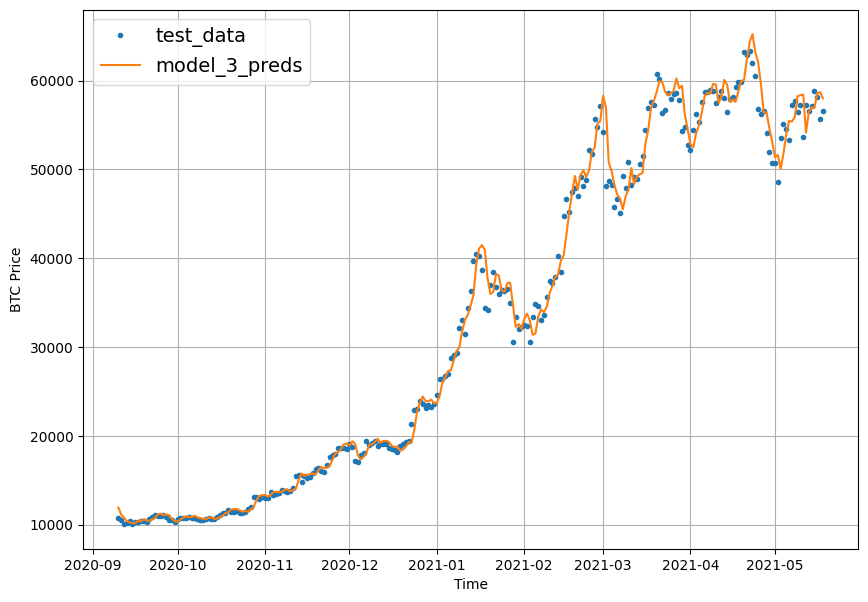

In [45]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(X_test[-len(test_windows_30_7):], test_labels_30_7[:, 0], start=offset, label='test_data')
plot_time_series(X_test[-len(test_windows_30_7):], model_3_preds[:,0], start=offset, format='-', label='model_3_preds')

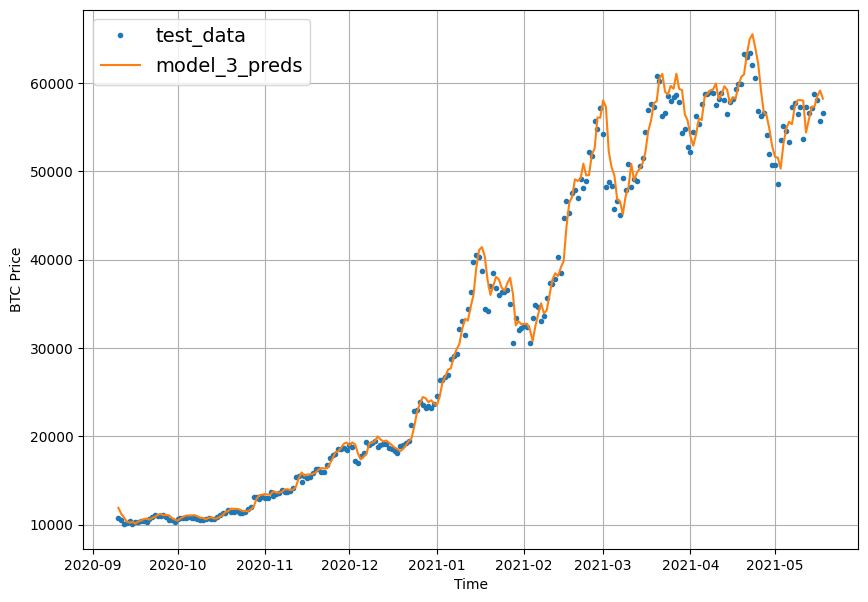

In [46]:
# or reduce it
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(X_test[-len(test_windows_30_7):], test_labels_30_7[:, 0], start=offset, label='test_data')
plot_time_series(X_test[-len(test_windows_30_7):], tf.reduce_mean(model_3_preds, axis=1), start=offset, format='-', label='model_3_preds')

<Axes: >

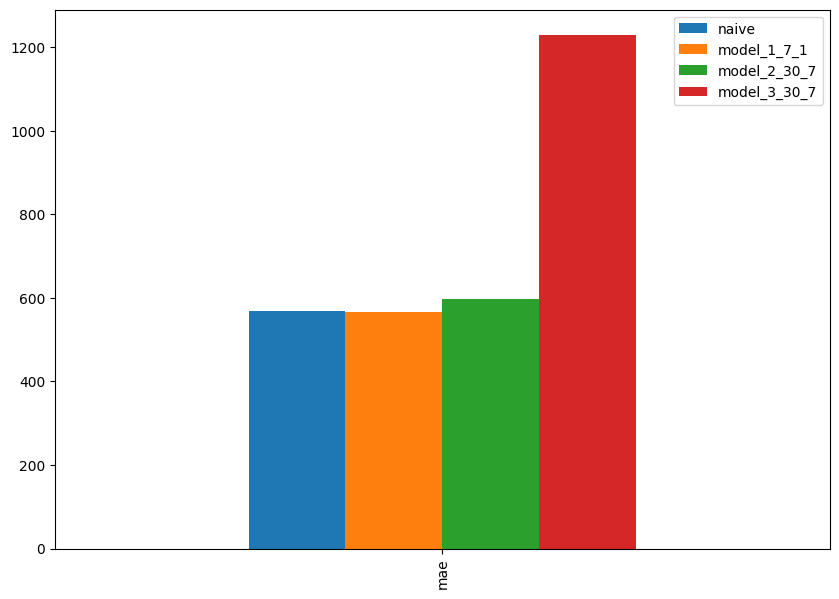

In [47]:
# Compare dense models
pd.DataFrame({"naive":model_0_results["mae"],
              "model_1_7_1":model_1_results["mae"],
              "model_2_30_7":model_2_results["mae"],
              "model_3_30_7":model_3_results["mae"]}, index=['mae']).plot(figsize=(10, 7), kind='bar')

In [48]:
# Model 4 : Conv1D - window-7, horizon-1
full_windows_7_1, full_labels_7_1 = make_windows(prices, window_size=7, horizon=1)
train_windows_7_1, test_windows_7_1, train_labels_7_1, test_labels_7_1 = make_train_test_splits(full_windows_7_1,
                                                                                                full_labels_7_1)

# we need input shape of : {batch_size, timesteps, input_dim}
tf.expand_dims(train_windows_7_1[0], axis=1).shape

TensorShape([7, 1])

In [49]:
# create expand_dims layer
expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
expand_dims_layer(train_windows_7_1[0])

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]], dtype=float32)>

In [50]:
# conv1d
tf.random.set_seed(42)
model_4 = tf.keras.models.Sequential([
    expand_dims_layer,
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding='causal', activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
], name='model_4_conv1d_7_1')
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae','mse'])
history4 = model_4.fit(train_windows_7_1, train_labels_7_1,
                      epochs=100,
                     batch_size=128,
                     validation_data=(test_windows_7_1, test_labels_7_1),
                     callbacks=create_model_checkpoint(model_4.name),
                      verbose=1)

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1460.8126 - mae: 1460.8126 - mse: 7158656.0000  INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 1s 36ms/step - loss: 1460.8126 - mae: 1460.8126 - mse: 7158656.0000 - val_loss: 1571.3948 - val_mae: 1571.3948 - val_mse: 6926245.0000
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 329.7934 - mae: 329.7934 - mse: 429387.5625 - val_loss: 1722.7231 - val_mae: 1722.7231 - val_mse: 7083106.0000
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 231.1797 - mae: 231.1797 - mse: 181216.8281INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 19ms/step - loss: 209.4324 - mae: 209.4324 - mse: 218139.2656 - val_loss: 1135.3427 - val_mae: 1135.3427 - val_mse: 3698868.0000
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 223.2221 - mae: 223.2221 - mse: 204788.6406INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 1s 33ms/step - loss: 182.7533 - mae: 182.7533 - mse: 170502.1719 - val_loss: 983.6707 - val_mae: 983.6707 - val_mse: 3188898.0000
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 177.1006 - mae: 177.1006 - mse: 166659.2969 - val_loss: 992.2412 - val_mae: 992.2412 - val_mse: 3160171.7500
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 133.3947 - mae: 133.3947 - mse: 66955.1719INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 19ms/step - loss: 173.7393 - mae: 173.7393 - mse: 159422.7344 - val_loss: 980.1573 - val_mae: 980.1573 - val_mse: 3239492.5000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 212.5964 - mae: 212.5964 - mse: 307830.9375INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 173.3613 - mae: 173.3613 - mse: 158076.4688 - val_loss: 937.9113 - val_mae: 937.9113 - val_mse: 2946432.0000
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 149.0228 - mae: 149.0228 - mse: 83345.4141INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 18ms/step - loss: 167.6099 - mae: 167.6099 - mse: 149564.3750 - val_loss: 930.4276 - val_mae: 930.4276 - val_mse: 2860272.0000
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 165.4338 - mae: 165.4338 - mse: 147049.3750 - val_loss: 948.8145 - val_mae: 948.8145 - val_mse: 2837943.0000
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 180.7261 - mae: 180.7261 - mse: 229456.7344INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 18ms/step - loss: 162.2932 - mae: 162.2932 - mse: 142165.9062 - val_loss: 896.5521 - val_mae: 896.5521 - val_mse: 2678847.5000
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 182.4763 - mae: 182.4763 - mse: 137006.0469INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 158.9986 - mae: 158.9986 - mse: 136558.6562 - val_loss: 879.7542 - val_mae: 879.7542 - val_mse: 2585861.0000
Epoch 12/100
18/18 [==============================] - 0s 3ms/step - loss: 156.7765 - mae: 156.7765 - mse: 132283.9531 - val_loss: 940.9005 - val_mae: 940.9005 - val_mse: 2663213.5000
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 124.4650 - mae: 124.4650 - mse: 96023.9375INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 154.8547 - mae: 154.8547 - mse: 130975.5938 - val_loss: 864.2239 - val_mae: 864.2239 - val_mse: 2422626.5000
Epoch 14/100
18/18 [==============================] - 0s 3ms/step - loss: 150.8235 - mae: 150.8235 - mse: 124573.9453 - val_loss: 864.4850 - val_mae: 864.4850 - val_mse: 2364366.7500
Epoch 15/100
18/18 [==============================] - 0s 3ms/step - loss: 151.1604 - mae: 151.1604 - mse: 123849.0078 - val_loss: 905.7139 - val_mae: 905.7139 - val_mse: 2432077.2500
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 141.8849 - mae: 141.8849 - mse: 86478.9219INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 146.3794 - mae: 146.3794 - mse: 117512.7891 - val_loss: 820.6914 - val_mae: 820.6914 - val_mse: 2165681.2500
Epoch 17/100
18/18 [==============================] - 0s 3ms/step - loss: 142.3176 - mae: 142.3176 - mse: 112325.5781 - val_loss: 833.8582 - val_mae: 833.8582 - val_mse: 2150203.5000
Epoch 18/100
18/18 [==============================] - 0s 3ms/step - loss: 139.2742 - mae: 139.2742 - mse: 109224.7500 - val_loss: 823.6193 - val_mae: 823.6193 - val_mse: 2087553.8750
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 81.4250 - mae: 81.4250 - mse: 32368.3750INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 18ms/step - loss: 137.4535 - mae: 137.4535 - mse: 105734.0078 - val_loss: 764.9522 - val_mae: 764.9522 - val_mse: 1913095.8750
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 143.5301 - mae: 143.5301 - mse: 118968.2422INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 137.4396 - mae: 137.4396 - mse: 106915.6797 - val_loss: 752.2773 - val_mae: 752.2773 - val_mse: 1915555.6250
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 175.6759 - mae: 175.6759 - mse: 138537.4375INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 134.8743 - mae: 134.8743 - mse: 102916.4453 - val_loss: 724.7713 - val_mae: 724.7713 - val_mse: 1783326.0000
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 174.4934 - mae: 174.4934 - mse: 187098.2344INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 132.0783 - mae: 132.0783 - mse: 98438.9375 - val_loss: 713.6053 - val_mae: 713.6053 - val_mse: 1730204.6250
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 142.9389 - mae: 142.9389 - mse: 93678.9375INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 18ms/step - loss: 129.1115 - mae: 129.1115 - mse: 94728.4844 - val_loss: 707.6378 - val_mae: 707.6378 - val_mse: 1668879.7500
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 138.1496 - mae: 138.1496 - mse: 88264.9688INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 131.0001 - mae: 131.0001 - mse: 95233.9844 - val_loss: 703.1826 - val_mae: 703.1826 - val_mse: 1632846.7500
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 133.4537 - mae: 133.4537 - mse: 72195.8906INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 130.6909 - mae: 130.6909 - mse: 93765.3516 - val_loss: 688.2042 - val_mae: 688.2042 - val_mse: 1585115.8750
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 120.4428 - mae: 120.4428 - mse: 62164.3125INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 124.7212 - mae: 124.7212 - mse: 88458.7578 - val_loss: 684.6431 - val_mae: 684.6431 - val_mse: 1603247.8750
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 183.7774 - mae: 183.7774 - mse: 167033.2969INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 29ms/step - loss: 123.1574 - mae: 123.1574 - mse: 88531.6641 - val_loss: 666.0939 - val_mae: 666.0939 - val_mse: 1515836.3750
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 119.2455 - mae: 119.2455 - mse: 77998.8906INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 18ms/step - loss: 120.7312 - mae: 120.7312 - mse: 84184.6484 - val_loss: 662.6749 - val_mae: 662.6749 - val_mse: 1483691.3750
Epoch 29/100
18/18 [==============================] - 0s 3ms/step - loss: 120.2486 - mae: 120.2486 - mse: 84687.0781 - val_loss: 681.1163 - val_mae: 681.1163 - val_mse: 1505880.3750
Epoch 30/100
18/18 [==============================] - 0s 3ms/step - loss: 125.8702 - mae: 125.8702 - mse: 86508.6484 - val_loss: 828.4807 - val_mae: 828.4807 - val_mse: 1923579.6250
Epoch 31/100
18/18 [==============================] - 0s 3ms/step - loss: 138.1292 - mae: 138.1292 - mse: 97663.8594 - val_loss: 808.5941 - val_mae: 808.5941 - val_mse: 1853403.2500
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 135.3323 - mae: 135.3323 - mse: 83363.9766INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.Unknown

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 18ms/step - loss: 132.2206 - mae: 132.2206 - mse: 87961.7344 - val_loss: 636.9786 - val_mae: 636.9786 - val_mse: 1412866.3750
Epoch 33/100
18/18 [==============================] - 0s 3ms/step - loss: 126.6088 - mae: 126.6088 - mse: 82632.3047 - val_loss: 685.7783 - val_mae: 685.7783 - val_mse: 1562457.3750
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 134.4860 - mae: 134.4860 - mse: 134383.4688INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 118.9802 - mae: 118.9802 - mse: 82624.9844 - val_loss: 629.5948 - val_mae: 629.5948 - val_mse: 1376805.7500
Epoch 35/100
18/18 [==============================] - 0s 3ms/step - loss: 116.9571 - mae: 116.9571 - mse: 81690.5078 - val_loss: 634.2715 - val_mae: 634.2715 - val_mse: 1372923.1250
Epoch 36/100
18/18 [==============================] - 0s 3ms/step - loss: 121.7481 - mae: 121.7481 - mse: 81472.4922 - val_loss: 690.4343 - val_mae: 690.4343 - val_mse: 1494097.5000
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 151.4934 - mae: 151.4934 - mse: 124027.9375INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 118.8950 - mae: 118.8950 - mse: 80830.5469 - val_loss: 628.0829 - val_mae: 628.0829 - val_mse: 1351141.1250
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 104.4269 - mae: 104.4269 - mse: 68770.7891INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 114.7974 - mae: 114.7974 - mse: 79102.9844 - val_loss: 615.0865 - val_mae: 615.0865 - val_mse: 1333140.7500
Epoch 39/100
18/18 [==============================] - 0s 3ms/step - loss: 115.6879 - mae: 115.6879 - mse: 78587.2422 - val_loss: 647.6823 - val_mae: 647.6823 - val_mse: 1425896.0000
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 109.3910 - mae: 109.3910 - mse: 95740.1719INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 18ms/step - loss: 114.2055 - mae: 114.2055 - mse: 78856.1172 - val_loss: 610.6624 - val_mae: 610.6624 - val_mse: 1311176.7500
Epoch 41/100
18/18 [==============================] - 0s 3ms/step - loss: 114.1600 - mae: 114.1600 - mse: 77772.7734 - val_loss: 611.9995 - val_mae: 611.9995 - val_mse: 1325932.3750
Epoch 42/100
 1/18 [>.............................] - ETA: 0s - loss: 107.9852 - mae: 107.9852 - mse: 60429.9141INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 117.2525 - mae: 117.2525 - mse: 80390.7188 - val_loss: 608.4311 - val_mae: 608.4311 - val_mse: 1297795.2500
Epoch 43/100
18/18 [==============================] - 0s 3ms/step - loss: 113.3760 - mae: 113.3760 - mse: 76504.1172 - val_loss: 620.2997 - val_mae: 620.2997 - val_mse: 1343057.5000
Epoch 44/100
18/18 [==============================] - 0s 3ms/step - loss: 116.3708 - mae: 116.3708 - mse: 78666.6016 - val_loss: 661.4995 - val_mae: 661.4995 - val_mse: 1449826.0000
Epoch 45/100
18/18 [==============================] - 0s 3ms/step - loss: 116.0668 - mae: 116.0668 - mse: 79350.9141 - val_loss: 614.1611 - val_mae: 614.1611 - val_mse: 1299469.3750
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 86.1735 - mae: 86.1735 - mse: 48600.5312INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownAr

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 114.2944 - mae: 114.2944 - mse: 77573.8047 - val_loss: 601.3713 - val_mae: 601.3713 - val_mse: 1276614.0000
Epoch 47/100
18/18 [==============================] - 0s 3ms/step - loss: 111.8652 - mae: 111.8652 - mse: 76323.9922 - val_loss: 620.6895 - val_mae: 620.6895 - val_mse: 1308187.1250
Epoch 48/100
18/18 [==============================] - 0s 3ms/step - loss: 112.0480 - mae: 112.0480 - mse: 76203.9609 - val_loss: 661.4187 - val_mae: 661.4187 - val_mse: 1394650.0000
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 172.8801 - mae: 172.8801 - mse: 127263.4219INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 115.8386 - mae: 115.8386 - mse: 76974.8984 - val_loss: 599.7115 - val_mae: 599.7115 - val_mse: 1266459.2500
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 136.4147 - mae: 136.4147 - mse: 148235.8906INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 113.3218 - mae: 113.3218 - mse: 76414.5938 - val_loss: 593.6790 - val_mae: 593.6790 - val_mse: 1264573.0000
Epoch 51/100
18/18 [==============================] - 0s 3ms/step - loss: 112.7002 - mae: 112.7002 - mse: 76540.2578 - val_loss: 617.1699 - val_mae: 617.1699 - val_mse: 1293781.6250
Epoch 52/100
18/18 [==============================] - 0s 3ms/step - loss: 118.3840 - mae: 118.3840 - mse: 80085.3125 - val_loss: 598.6921 - val_mae: 598.6921 - val_mse: 1258863.7500
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 62.1560 - mae: 62.1560 - mse: 21586.5938INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 18ms/step - loss: 115.0537 - mae: 115.0537 - mse: 77287.2344 - val_loss: 590.9590 - val_mae: 590.9590 - val_mse: 1248365.8750
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 101.6255 - mae: 101.6255 - mse: 76341.5000INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 110.4500 - mae: 110.4500 - mse: 74388.3516 - val_loss: 589.5178 - val_mae: 589.5178 - val_mse: 1246926.7500
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 128.9030 - mae: 128.9030 - mse: 107269.6875INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 19ms/step - loss: 113.3358 - mae: 113.3358 - mse: 77551.9531 - val_loss: 588.4014 - val_mae: 588.4014 - val_mse: 1244501.8750
Epoch 56/100
18/18 [==============================] - 0s 3ms/step - loss: 110.9717 - mae: 110.9717 - mse: 74287.7891 - val_loss: 759.7305 - val_mae: 759.7305 - val_mse: 1733505.0000
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 127.0825 - mae: 127.0825 - mse: 86669.9297 - val_loss: 705.1562 - val_mae: 705.1562 - val_mse: 1553537.3750
Epoch 58/100
18/18 [==============================] - 0s 3ms/step - loss: 121.0308 - mae: 121.0308 - mse: 80620.8984 - val_loss: 724.2445 - val_mae: 724.2445 - val_mse: 1614528.5000
Epoch 59/100
18/18 [==============================] - 0s 3ms/step - loss: 114.1856 - mae: 114.1856 - mse: 75391.5469 - val_loss: 650.4001 - val_mae: 650.4001 - val_mse: 1391363.1250
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 114.4329 - mae: 114.4329 - m

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 110.7612 - mae: 110.7612 - mse: 72594.6406 - val_loss: 586.5339 - val_mae: 586.5339 - val_mse: 1237544.6250
Epoch 63/100
18/18 [==============================] - 0s 3ms/step - loss: 111.4165 - mae: 111.4165 - mse: 74612.5703 - val_loss: 614.4367 - val_mae: 614.4367 - val_mse: 1275800.7500
Epoch 64/100
18/18 [==============================] - 0s 3ms/step - loss: 112.4078 - mae: 112.4078 - mse: 74772.6406 - val_loss: 649.2021 - val_mae: 649.2021 - val_mse: 1348998.2500
Epoch 65/100
18/18 [==============================] - 0s 3ms/step - loss: 115.3575 - mae: 115.3575 - mse: 76679.8672 - val_loss: 594.5147 - val_mae: 594.5147 - val_mse: 1236039.5000
Epoch 66/100
18/18 [==============================] - 0s 3ms/step - loss: 111.7079 - mae: 111.7079 - mse: 73803.9688 - val_loss: 590.5174 - val_mae: 590.5174 - val_mse: 1244015.0000
Epoch 67/100
18/18 [==============================] - 0s 3ms/step - loss: 108.8176 - mae: 108.8176 - m

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 1s 32ms/step - loss: 111.0984 - mae: 111.0984 - mse: 73482.6562 - val_loss: 585.6987 - val_mae: 585.6987 - val_mse: 1218819.6250
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 96.5823 - mae: 96.5823 - mse: 73650.7344INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 20ms/step - loss: 110.2340 - mae: 110.2340 - mse: 73473.7734 - val_loss: 582.0322 - val_mae: 582.0322 - val_mse: 1212829.3750
Epoch 73/100
18/18 [==============================] - 0s 3ms/step - loss: 110.3769 - mae: 110.3769 - mse: 73088.0000 - val_loss: 592.6863 - val_mae: 592.6863 - val_mse: 1244194.5000
Epoch 74/100
18/18 [==============================] - 0s 3ms/step - loss: 109.9619 - mae: 109.9619 - mse: 73397.0234 - val_loss: 582.2795 - val_mae: 582.2795 - val_mse: 1220674.2500
Epoch 75/100
18/18 [==============================] - 0s 3ms/step - loss: 109.5924 - mae: 109.5924 - mse: 72637.7344 - val_loss: 600.0427 - val_mae: 600.0427 - val_mse: 1238202.0000
Epoch 76/100
18/18 [==============================] - 0s 3ms/step - loss: 111.6113 - mae: 111.6113 - mse: 74531.2266 - val_loss: 604.3207 - val_mae: 604.3207 - val_mse: 1263557.1250
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 110.3125 - mae: 110.3125 - m

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 21ms/step - loss: 110.9839 - mae: 110.9839 - mse: 73451.8047 - val_loss: 577.0273 - val_mae: 577.0273 - val_mse: 1200977.1250
Epoch 79/100
18/18 [==============================] - 0s 3ms/step - loss: 110.6861 - mae: 110.6861 - mse: 75023.1328 - val_loss: 622.5135 - val_mae: 622.5135 - val_mse: 1302797.3750
Epoch 80/100
 1/18 [>.............................] - ETA: 0s - loss: 121.0877 - mae: 121.0877 - mse: 132096.6562INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 111.3098 - mae: 111.3098 - mse: 73981.0469 - val_loss: 575.1769 - val_mae: 575.1769 - val_mse: 1201710.5000
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 95.7673 - mae: 95.7673 - mse: 46088.3828INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 19ms/step - loss: 108.0948 - mae: 108.0948 - mse: 71593.2109 - val_loss: 573.6288 - val_mae: 573.6288 - val_mse: 1196038.5000
Epoch 82/100
18/18 [==============================] - 0s 3ms/step - loss: 114.5922 - mae: 114.5922 - mse: 76882.4062 - val_loss: 578.5881 - val_mae: 578.5881 - val_mse: 1198123.3750
Epoch 83/100
18/18 [==============================] - 0s 3ms/step - loss: 112.6059 - mae: 112.6059 - mse: 74929.8672 - val_loss: 624.1769 - val_mae: 624.1769 - val_mse: 1303513.3750
Epoch 84/100
18/18 [==============================] - 0s 3ms/step - loss: 114.1147 - mae: 114.1147 - mse: 73881.3047 - val_loss: 576.7545 - val_mae: 576.7545 - val_mse: 1194487.3750
Epoch 85/100
 1/18 [>.............................] - ETA: 0s - loss: 86.2405 - mae: 86.2405 - mse: 41833.1328INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownAr

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 17ms/step - loss: 109.1256 - mae: 109.1256 - mse: 73256.8906 - val_loss: 572.4233 - val_mae: 572.4233 - val_mse: 1191874.2500
Epoch 86/100
18/18 [==============================] - 0s 3ms/step - loss: 110.2502 - mae: 110.2502 - mse: 73107.2188 - val_loss: 668.6558 - val_mae: 668.6558 - val_mse: 1385752.5000
Epoch 87/100
18/18 [==============================] - 0s 3ms/step - loss: 111.5094 - mae: 111.5094 - mse: 71644.2891 - val_loss: 576.0106 - val_mae: 576.0106 - val_mse: 1191085.7500
Epoch 88/100
18/18 [==============================] - 0s 3ms/step - loss: 108.9235 - mae: 108.9235 - mse: 72543.8672 - val_loss: 601.6687 - val_mae: 601.6687 - val_mse: 1252015.6250
Epoch 89/100
18/18 [==============================] - 0s 3ms/step - loss: 110.5126 - mae: 110.5126 - mse: 71557.2891 - val_loss: 583.4177 - val_mae: 583.4177 - val_mse: 1215417.8750
Epoch 90/100
18/18 [==============================] - 0s 3ms/step - loss: 106.8134 - mae: 106.8134 - m

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(5, 7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefd6750be0>, 140667889022336), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefc47c3eb0>, 140667889022256), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(None, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff01029a850>, 140667889860896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7ff0102887c0>, 140667889861216), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_4_conv1d_7_1/assets


18/18 [==============================] - 0s 18ms/step - loss: 107.7006 - mae: 107.7006 - mse: 70638.7734 - val_loss: 572.3364 - val_mae: 572.3364 - val_mse: 1183413.1250
Epoch 96/100
18/18 [==============================] - 0s 3ms/step - loss: 116.3903 - mae: 116.3903 - mse: 75427.9766 - val_loss: 605.8516 - val_mae: 605.8516 - val_mse: 1257586.7500
Epoch 97/100
18/18 [==============================] - 0s 3ms/step - loss: 110.2702 - mae: 110.2702 - mse: 72911.0000 - val_loss: 605.4230 - val_mae: 605.4230 - val_mse: 1256508.6250
Epoch 98/100
18/18 [==============================] - 0s 3ms/step - loss: 110.7031 - mae: 110.7031 - mse: 72282.9766 - val_loss: 581.5759 - val_mae: 581.5759 - val_mse: 1196542.8750
Epoch 99/100
18/18 [==============================] - 0s 3ms/step - loss: 110.0133 - mae: 110.0133 - mse: 72138.3984 - val_loss: 581.6790 - val_mae: 581.6790 - val_mse: 1195634.6250
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 110.0210 - mae: 110.0210 - 

In [51]:
model_4.evaluate(test_windows_7_1, test_labels_7_1)

18/18 [==============================] - 0s 1ms/step - loss: 633.4786 - mae: 633.4786 - mse: 1302383.3750


[633.4786376953125, 633.4786376953125, 1302383.375]

In [52]:
model_4 = tf.keras.models.load_model("10_model_experiments/"+model_4.name)
model_4.evaluate(test_windows_7_1, test_labels_7_1)

18/18 [==============================] - 0s 1ms/step - loss: 572.3363 - mae: 572.3363 - mse: 1183413.3750


[572.3363037109375, 572.3363037109375, 1183413.375]

In [53]:
model_4_preds = make_preds(model_4, test_windows_7_1)
model_4_results = evaluate_preds(tf.squeeze(test_labels_7_1), model_4_preds)
model_4_results

18/18 [==============================] - 0s 798us/step


{'mae': 572.3363,
 'mse': 1183413.4,
 'rmse': 1087.848,
 'mape': 2.551474,
 'mase': 1.0054364}

In [54]:
# Model 5 - LSTM (7_1)
inputs = tf.keras.layers.Input(shape=(7,))
x = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = tf.keras.layers.LSTM(128, activation=tf.keras.activations.relu)(x)
outputs = tf.keras.layers.Dense(1)(x)
model_5 = tf.keras.Model(inputs, outputs, name='model_5_LSTM_7_1')
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())
history_5 = model_5.fit(train_windows_7_1, train_labels_7_1,
                        epochs=100,
                        batch_size=128,
                        validation_data=(test_windows_7_1, test_labels_7_1),
                        callbacks=create_model_checkpoint(model_5.name))

Epoch 1/100
 1/18 [>.............................] - ETA: 15s - loss: 3914.2925INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 2s 52ms/step - loss: 2682.6499 - val_loss: 12357.7666
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 1520.7200INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 56ms/step - loss: 1371.8885 - val_loss: 4601.4629
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 621.9684INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 44ms/step - loss: 358.4668 - val_loss: 1369.9669
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 332.6660INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 41ms/step - loss: 214.4343 - val_loss: 1100.6571
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 179.6181INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 46ms/step - loss: 190.6353 - val_loss: 1097.3019
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 148.2727INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 44ms/step - loss: 186.7373 - val_loss: 1045.7919
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 185.6474 - val_loss: 1057.2706
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 184.6687 - val_loss: 1063.8041
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 183.4497 - val_loss: 1053.1813
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 202.3816INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 57ms/step - loss: 182.5818 - val_loss: 1039.1587
Epoch 11/100
18/18 [==============================] - 0s 4ms/step - loss: 182.6393 - val_loss: 1044.2257
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 176.3651INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 42ms/step - loss: 180.5527 - val_loss: 1035.8004
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 142.3315INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 44ms/step - loss: 179.0892 - val_loss: 1024.6073
Epoch 14/100
18/18 [==============================] - 0s 4ms/step - loss: 177.8118 - val_loss: 1037.7233
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 178.0541INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 48ms/step - loss: 177.1749 - val_loss: 1023.5549
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 174.1353INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 48ms/step - loss: 175.2175 - val_loss: 976.0272
Epoch 17/100
18/18 [==============================] - 0s 4ms/step - loss: 173.6857 - val_loss: 1031.5364
Epoch 18/100
18/18 [==============================] - 0s 4ms/step - loss: 173.1965 - val_loss: 1000.2397
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 171.5281 - val_loss: 1023.8640
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 181.3177INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 59ms/step - loss: 171.2618 - val_loss: 948.7667
Epoch 21/100
18/18 [==============================] - 0s 4ms/step - loss: 168.1596 - val_loss: 951.2922
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 227.1738INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 46ms/step - loss: 166.8477 - val_loss: 933.4855
Epoch 23/100
18/18 [==============================] - 0s 4ms/step - loss: 167.5598 - val_loss: 937.1384
Epoch 24/100
18/18 [==============================] - 0s 4ms/step - loss: 164.1892 - val_loss: 954.6922
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 162.4995INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 44ms/step - loss: 161.9892 - val_loss: 931.5754
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 161.7341INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 44ms/step - loss: 160.2205 - val_loss: 910.7425
Epoch 27/100
18/18 [==============================] - 0s 4ms/step - loss: 159.1919 - val_loss: 917.2043
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 156.0880INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 46ms/step - loss: 158.3188 - val_loss: 878.9839
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 143.9342INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 43ms/step - loss: 155.5071 - val_loss: 874.5139
Epoch 30/100
18/18 [==============================] - 0s 4ms/step - loss: 154.8432 - val_loss: 875.2631
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 181.9384INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 59ms/step - loss: 152.0876 - val_loss: 852.5768
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 127.9970INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 43ms/step - loss: 150.8795 - val_loss: 851.9588
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 149.5719 - val_loss: 906.7188
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 148.7969INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 43ms/step - loss: 149.0952 - val_loss: 813.6459
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 145.6623 - val_loss: 831.8452
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 182.9518INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 42ms/step - loss: 145.8713 - val_loss: 795.7061
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 143.9935 - val_loss: 815.5272
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 142.7874INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 44ms/step - loss: 141.5542 - val_loss: 778.6975
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 139.3815INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 56ms/step - loss: 140.0351 - val_loss: 774.3975
Epoch 40/100
18/18 [==============================] - 0s 4ms/step - loss: 139.9395 - val_loss: 776.2658
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 139.4933INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 41ms/step - loss: 136.9919 - val_loss: 754.6711
Epoch 42/100
18/18 [==============================] - 0s 3ms/step - loss: 136.2752 - val_loss: 760.8578
Epoch 43/100
18/18 [==============================] - 0s 3ms/step - loss: 134.7613 - val_loss: 764.5514
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 77.2830INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 40ms/step - loss: 132.5573 - val_loss: 733.1152
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 93.9323INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 43ms/step - loss: 131.8792 - val_loss: 726.8974
Epoch 46/100
18/18 [==============================] - 0s 3ms/step - loss: 131.2236 - val_loss: 746.2568
Epoch 47/100
 1/18 [>.............................] - ETA: 0s - loss: 123.8221INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 40ms/step - loss: 130.8027 - val_loss: 721.7065
Epoch 48/100
18/18 [==============================] - 0s 3ms/step - loss: 129.0596 - val_loss: 722.9947
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 184.8233INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 58ms/step - loss: 127.9586 - val_loss: 715.9099
Epoch 50/100
18/18 [==============================] - 0s 3ms/step - loss: 132.4065 - val_loss: 742.0989
Epoch 51/100
18/18 [==============================] - 0s 3ms/step - loss: 131.1148 - val_loss: 783.5771
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 123.3917INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 46ms/step - loss: 131.9006 - val_loss: 688.7929
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 79.2493INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 43ms/step - loss: 126.7933 - val_loss: 686.2681
Epoch 54/100
18/18 [==============================] - 0s 4ms/step - loss: 125.9738 - val_loss: 687.0188
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 139.5273INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 44ms/step - loss: 123.7509 - val_loss: 676.2540
Epoch 56/100
18/18 [==============================] - 0s 3ms/step - loss: 125.6067 - val_loss: 679.9132
Epoch 57/100
18/18 [==============================] - 0s 3ms/step - loss: 124.9582 - val_loss: 689.9833
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 118.2030INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 43ms/step - loss: 121.8493 - val_loss: 663.2873
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 91.4412INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 59ms/step - loss: 121.1527 - val_loss: 658.3953
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 121.1932 - val_loss: 664.3331
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 122.3755 - val_loss: 705.3687
Epoch 62/100
18/18 [==============================] - 0s 3ms/step - loss: 124.9114 - val_loss: 721.4459
Epoch 63/100
 1/18 [>.............................] - ETA: 0s - loss: 123.5661INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 41ms/step - loss: 123.8773 - val_loss: 657.7091
Epoch 64/100
18/18 [==============================] - 0s 3ms/step - loss: 118.8370 - val_loss: 658.0346
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 127.7844INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 43ms/step - loss: 119.4298 - val_loss: 641.3522
Epoch 66/100
18/18 [==============================] - 0s 3ms/step - loss: 118.0379 - val_loss: 658.0311
Epoch 67/100
 1/18 [>.............................] - ETA: 0s - loss: 101.1593INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 41ms/step - loss: 119.0165 - val_loss: 637.1038
Epoch 68/100
 1/18 [>.............................] - ETA: 0s - loss: 78.4123INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 41ms/step - loss: 118.4751 - val_loss: 634.4116
Epoch 69/100
18/18 [==============================] - 0s 3ms/step - loss: 120.2309 - val_loss: 639.3754
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 120.5351INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 57ms/step - loss: 117.5484 - val_loss: 631.5536
Epoch 71/100
18/18 [==============================] - 0s 4ms/step - loss: 116.9527 - val_loss: 644.4714
Epoch 72/100
18/18 [==============================] - 0s 3ms/step - loss: 118.6769 - val_loss: 632.6390
Epoch 73/100
 1/18 [>.............................] - ETA: 0s - loss: 135.6285INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 43ms/step - loss: 116.7454 - val_loss: 627.6404
Epoch 74/100
18/18 [==============================] - 0s 4ms/step - loss: 116.6543 - val_loss: 635.0552
Epoch 75/100
18/18 [==============================] - 0s 3ms/step - loss: 116.4332 - val_loss: 641.1146
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 85.4562INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 42ms/step - loss: 115.8937 - val_loss: 625.0060
Epoch 77/100
18/18 [==============================] - 0s 4ms/step - loss: 118.0972 - val_loss: 670.7295
Epoch 78/100
18/18 [==============================] - 0s 3ms/step - loss: 118.2964 - val_loss: 632.6258
Epoch 79/100
 1/18 [>.............................] - ETA: 0s - loss: 113.0218INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 41ms/step - loss: 115.0540 - val_loss: 617.2976
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 115.2614 - val_loss: 643.2731
Epoch 81/100
18/18 [==============================] - 0s 3ms/step - loss: 114.9695 - val_loss: 638.6069
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 222.8460INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 42ms/step - loss: 117.2458 - val_loss: 616.9514
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 114.7474 - val_loss: 650.0321
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 116.4223 - val_loss: 624.1476
Epoch 85/100
18/18 [==============================] - 0s 3ms/step - loss: 115.6836 - val_loss: 644.5536
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 116.8437 - val_loss: 617.0712
Epoch 87/100
 1/18 [>.............................] - ETA: 0s - loss: 133.7390INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 58ms/step - loss: 114.6518 - val_loss: 608.2769
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 113.3875 - val_loss: 612.4838
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 112.9272 - val_loss: 647.1362
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 119.1381 - val_loss: 630.2060
Epoch 91/100
18/18 [==============================] - 0s 4ms/step - loss: 116.0320 - val_loss: 671.6974
Epoch 92/100
 1/18 [>.............................] - ETA: 0s - loss: 118.2137INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_5_LSTM_7_1/assets


18/18 [==============================] - 1s 42ms/step - loss: 114.4690 - val_loss: 604.1428
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 114.4221 - val_loss: 610.2006
Epoch 94/100
18/18 [==============================] - 0s 3ms/step - loss: 113.2846 - val_loss: 640.0298
Epoch 95/100
18/18 [==============================] - 0s 4ms/step - loss: 114.0241 - val_loss: 616.9393
Epoch 96/100
18/18 [==============================] - 0s 4ms/step - loss: 116.2656 - val_loss: 628.7891
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 120.5710 - val_loss: 631.5566
Epoch 98/100
18/18 [==============================] - 0s 4ms/step - loss: 116.5116 - val_loss: 606.5905
Epoch 99/100
18/18 [==============================] - 0s 4ms/step - loss: 112.9070 - val_loss: 604.6259
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 117.6209 - val_loss: 630.3510


In [55]:
model_5.evaluate(test_windows_7_1, test_labels_7_1)

18/18 [==============================] - 0s 1ms/step - loss: 630.3509


630.3508911132812

In [56]:
model_5 = tf.keras.models.load_model("10_model_experiments/"+model_5.name)
model_5.evaluate(test_windows_7_1, test_labels_7_1)

18/18 [==============================] - 0s 1ms/step - loss: 604.1428


604.142822265625

In [57]:
model_5_preds = make_preds(model_5, test_windows_7_1)
model_5_results = evaluate_preds(tf.squeeze(test_labels_7_1), model_5_preds)
model_5_results

18/18 [==============================] - 0s 876us/step


{'mae': 604.1428,
 'mse': 1297693.1,
 'rmse': 1139.1633,
 'mape': 2.7286255,
 'mase': 1.0613116}

### Multivariate data

In [58]:
# https://www.cmcmarkets.com/en-nz/learn-cryptocurrencies/bitcoin-halving
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [59]:
block_reward_1 = 50
block_reward_2 = 25 
block_reward_3 = 12.5 # 9th july 2016
block_reward_4 = 6.25 # 18th may 2020

block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

block_reward_2_datetime

numpy.datetime64('2012-11-28')

In [60]:
# create date ranges of where specific block_rewards should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

In [61]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [62]:
bitcoin_prices_block.iloc[:block_reward_2_days,-1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days : block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days : , -1] = block_reward_4
bitcoin_prices_block.block_reward.value_counts()

block_reward
12.5    1409
25      1012
6.25     366
Name: count, dtype: int64

<Axes: xlabel='Date'>

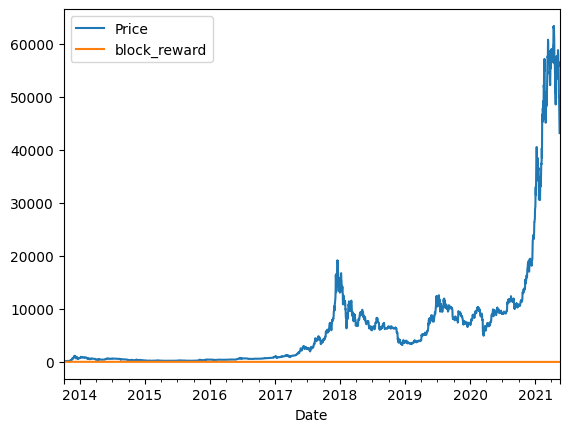

In [63]:
bitcoin_prices_block.plot()

<Axes: xlabel='Date'>

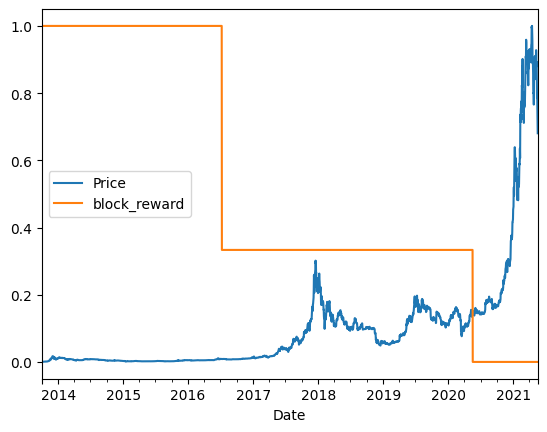

In [64]:
# normalize the data
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns = bitcoin_prices_block.columns,
                                     index = bitcoin_prices_block.index)
scaled_price_block_df.plot()

In [65]:
## making a windowed dataset for multivariate data
# use pandas dataframe shift
bitcoin_prices_windowed = bitcoin_prices_block.copy()

for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [66]:
# Create X(windows) and y(horizon) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [67]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [68]:
# split the data
split_size=int(0.8*len(X))
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

In [69]:
# Model 6 - Multivariate model(model_1)
tf.random.set_seed(42)
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(HORIZON)
], name='model_6_dense_multivariate_7_1')
model_6.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())
history_6 = model_6.fit(X_train, y_train,
                        epochs=100,
                        batch_size=128,
                        validation_data=(X_test, y_test),
                        callbacks=create_model_checkpoint(model_6.name))

Epoch 1/100
 1/18 [>.............................] - ETA: 6s - loss: 286.8763INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 1s 18ms/step - loss: 231.4504 - val_loss: 1108.8999
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 176.2270INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 192.5532 - val_loss: 1096.0969
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 143.9383INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 180.0550 - val_loss: 1001.9202
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 176.2083 - val_loss: 1149.8453
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 184.0673INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 165.1046 - val_loss: 872.0406
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 113.8003INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 151.4634 - val_loss: 844.5537
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 146.0704 - val_loss: 893.8797
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 126.0058INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 142.8257 - val_loss: 766.2516
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 124.5275INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 143.9461 - val_loss: 751.6985
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 138.6867INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 136.5654 - val_loss: 723.8603
Epoch 11/100
18/18 [==============================] - 0s 3ms/step - loss: 128.3642 - val_loss: 776.1895
Epoch 12/100
18/18 [==============================] - 0s 3ms/step - loss: 130.4608 - val_loss: 880.8287
Epoch 13/100
18/18 [==============================] - 0s 3ms/step - loss: 141.5774 - val_loss: 775.3331
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 127.1867INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 132.8049 - val_loss: 669.7884
Epoch 15/100
18/18 [==============================] - 0s 2ms/step - loss: 135.6821 - val_loss: 689.3513
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 107.3559INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 28ms/step - loss: 121.9923 - val_loss: 667.5692
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 103.7672INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 120.8896 - val_loss: 655.1301
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 132.2163INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 116.4168 - val_loss: 633.8385
Epoch 19/100
18/18 [==============================] - 0s 3ms/step - loss: 118.4538 - val_loss: 794.0979
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 142.1278INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 119.8052 - val_loss: 620.7719
Epoch 21/100
18/18 [==============================] - 0s 3ms/step - loss: 118.2503 - val_loss: 632.6683
Epoch 22/100
18/18 [==============================] - 0s 3ms/step - loss: 116.4236 - val_loss: 635.8173
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 114.1919INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 114.2276 - val_loss: 618.3292
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 122.2331INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 112.5447 - val_loss: 615.9608
Epoch 25/100
18/18 [==============================] - 0s 2ms/step - loss: 111.8825 - val_loss: 616.6513
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 111.4895INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 113.9118 - val_loss: 598.0662
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 151.1837INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 114.7011 - val_loss: 594.7183
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 101.0907INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 109.7398 - val_loss: 592.0434
Epoch 29/100
18/18 [==============================] - 0s 3ms/step - loss: 110.3463 - val_loss: 593.0312
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 128.3291INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 114.2580 - val_loss: 587.3674
Epoch 31/100
18/18 [==============================] - 0s 3ms/step - loss: 111.6686 - val_loss: 589.7461
Epoch 32/100
18/18 [==============================] - 0s 2ms/step - loss: 109.7270 - val_loss: 602.2771
Epoch 33/100
18/18 [==============================] - 0s 2ms/step - loss: 109.0495 - val_loss: 591.0455
Epoch 34/100
18/18 [==============================] - 0s 3ms/step - loss: 109.9751 - val_loss: 587.6835
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 96.0005INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 108.7394 - val_loss: 583.7341
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 151.1606INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 12ms/step - loss: 113.8505 - val_loss: 578.8162
Epoch 37/100
18/18 [==============================] - 0s 3ms/step - loss: 107.9414 - val_loss: 580.3048
Epoch 38/100
18/18 [==============================] - 0s 3ms/step - loss: 109.6461 - val_loss: 582.5831
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 126.6547INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 108.9181 - val_loss: 576.2200
Epoch 40/100
18/18 [==============================] - 0s 3ms/step - loss: 106.7358 - val_loss: 586.5577
Epoch 41/100
18/18 [==============================] - 0s 2ms/step - loss: 107.3145 - val_loss: 595.7186
Epoch 42/100
18/18 [==============================] - 0s 3ms/step - loss: 111.2656 - val_loss: 663.4557
Epoch 43/100
18/18 [==============================] - 0s 2ms/step - loss: 113.2106 - val_loss: 646.5777
Epoch 44/100
18/18 [==============================] - 0s 3ms/step - loss: 111.6838 - val_loss: 594.0436
Epoch 45/100
18/18 [==============================] - 0s 3ms/step - loss: 107.6857 - val_loss: 591.5266
Epoch 46/100
18/18 [==============================] - 0s 3ms/step - loss: 109.2313 - val_loss: 655.8237
Epoch 47/100
18/18 [==============================] - 0s 3ms/step - loss: 112.3747 - val_loss: 579.4316
Epoch 48/100
18/18 [==============================] - 0s 3ms/step - loss: 10

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 107.4626 - val_loss: 572.8262
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 126.0581INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 107.2016 - val_loss: 571.1212
Epoch 56/100
18/18 [==============================] - 0s 3ms/step - loss: 106.1777 - val_loss: 744.6245
Epoch 57/100
18/18 [==============================] - 0s 3ms/step - loss: 112.9749 - val_loss: 578.4843
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 94.6605INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 107.2094 - val_loss: 570.7858
Epoch 59/100
18/18 [==============================] - 0s 2ms/step - loss: 106.4778 - val_loss: 660.4359
Epoch 60/100
18/18 [==============================] - 0s 2ms/step - loss: 116.7004 - val_loss: 731.4093
Epoch 61/100
18/18 [==============================] - 0s 3ms/step - loss: 119.0396 - val_loss: 669.7252
Epoch 62/100
18/18 [==============================] - 0s 2ms/step - loss: 115.8826 - val_loss: 604.5198
Epoch 63/100
18/18 [==============================] - 0s 3ms/step - loss: 108.7127 - val_loss: 587.2144
Epoch 64/100
18/18 [==============================] - 0s 3ms/step - loss: 105.7756 - val_loss: 616.4947
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 133.2382INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 1

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 107.7958 - val_loss: 569.9880
Epoch 66/100
18/18 [==============================] - 0s 4ms/step - loss: 105.4782 - val_loss: 570.9311
Epoch 67/100
18/18 [==============================] - 0s 3ms/step - loss: 105.5145 - val_loss: 674.3844
Epoch 68/100
 1/18 [>.............................] - ETA: 0s - loss: 74.6187INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 106.6189 - val_loss: 568.2430
Epoch 69/100
18/18 [==============================] - 0s 3ms/step - loss: 111.0581 - val_loss: 679.5756
Epoch 70/100
18/18 [==============================] - 0s 3ms/step - loss: 117.3707 - val_loss: 569.3093
Epoch 71/100
18/18 [==============================] - 0s 4ms/step - loss: 107.1508 - val_loss: 571.9566
Epoch 72/100
18/18 [==============================] - 0s 3ms/step - loss: 109.4458 - val_loss: 580.2114
Epoch 73/100
 1/18 [>.............................] - ETA: 0s - loss: 121.1961INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 15ms/step - loss: 106.7402 - val_loss: 567.4146
Epoch 74/100
18/18 [==============================] - 0s 3ms/step - loss: 108.5910 - val_loss: 578.2289
Epoch 75/100
18/18 [==============================] - 0s 3ms/step - loss: 108.2427 - val_loss: 585.2754
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 75.9536INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 14ms/step - loss: 108.7040 - val_loss: 566.3171
Epoch 77/100
18/18 [==============================] - 0s 3ms/step - loss: 104.6757 - val_loss: 569.0724
Epoch 78/100
18/18 [==============================] - 0s 3ms/step - loss: 106.7823 - val_loss: 617.3176
Epoch 79/100
18/18 [==============================] - 0s 3ms/step - loss: 107.2164 - val_loss: 584.2284
Epoch 80/100
18/18 [==============================] - 0s 3ms/step - loss: 107.8464 - val_loss: 578.6688
Epoch 81/100
18/18 [==============================] - 0s 3ms/step - loss: 105.8628 - val_loss: 572.8231
Epoch 82/100
18/18 [==============================] - 0s 3ms/step - loss: 115.0241 - val_loss: 567.2895
Epoch 83/100
18/18 [==============================] - 0s 3ms/step - loss: 112.6367 - val_loss: 677.7429
Epoch 84/100
18/18 [==============================] - 0s 3ms/step - loss: 111.5478 - val_loss: 582.8985
Epoch 85/100
 1/18 [>.............................] - ETA: 0s - loss: 87.145

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(8, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fefa429edc0>, 140667098117024), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb2b0>, 140667094318496), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3eb160>, 140667094318976), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef9c3dd0d0>, 140667094317056), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_dense_multivariate_7_1/assets


18/18 [==============================] - 0s 13ms/step - loss: 107.0394 - val_loss: 566.0446
Epoch 86/100
18/18 [==============================] - 0s 3ms/step - loss: 105.6216 - val_loss: 571.8107
Epoch 87/100
18/18 [==============================] - 0s 3ms/step - loss: 104.6972 - val_loss: 620.3572
Epoch 88/100
18/18 [==============================] - 0s 3ms/step - loss: 108.7569 - val_loss: 569.7377
Epoch 89/100
18/18 [==============================] - 0s 3ms/step - loss: 105.5768 - val_loss: 569.3511
Epoch 90/100
18/18 [==============================] - 0s 3ms/step - loss: 105.2635 - val_loss: 566.4040
Epoch 91/100
18/18 [==============================] - 0s 3ms/step - loss: 108.1618 - val_loss: 567.4271
Epoch 92/100
18/18 [==============================] - 0s 3ms/step - loss: 107.8611 - val_loss: 622.0668
Epoch 93/100
18/18 [==============================] - 0s 3ms/step - loss: 118.3554 - val_loss: 647.1182
Epoch 94/100
18/18 [==============================] - 0s 3ms/step - loss: 11

In [70]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 811us/step - loss: 640.3640


640.3639526367188

In [71]:
model_6 = tf.keras.models.load_model("10_model_experiments/"+model_6.name)
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 867us/step - loss: 566.0446


566.0446166992188

In [72]:
model_6_preds = model_6.predict(X_test)
model_6_results = evaluate_preds(y_test, tf.squeeze(model_6_preds))
model_6_results

18/18 [==============================] - 0s 611us/step


{'mae': 566.0447,
 'mse': 1153239.8,
 'rmse': 1073.89,
 'mape': 2.5417213,
 'mase': 0.9943837}

In [73]:
model_0_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [74]:
# Model 7 - NBEATS model - works on univariate time series data only

#create n-beats block input

class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self, input_size, theta_size, horizon, n_neurons, n_layers, **kwargs):
        super().__init__(**kwargs)
        self.input_size=input_size
        self.theta_size=theta_size
        self.horizon=horizon
        self.n_neurons=n_neurons
        self.n_layers = n_layers

        #block contains stack of 4 fully connected layers each has relu activation
        self.hidden = [tf.keras.layers.Dense(self.n_neurons, activation=tf.keras.activations.relu) for _ in range(n_layers)]
        
        #output of block is a theta layer with linear activation
        self.theta_layer = tf.keras.layers.Dense(self.theta_size, activation=tf.keras.activations.linear, name='theta')

    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        # output the backcast and the forecast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast

tf.random.set_seed(42)
# test the n-beats block class
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=512,
                                       n_layers=4)
# create dummy inputs
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0)

# pass dummy inputs to nbeats block layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# these are the activation outputs of the theta layer (they'll be random due to no training of the model)
tf.squeeze(backcast.numpy()), tf.squeeze(forecast.numpy())

(<tf.Tensor: shape=(7,), dtype=float32, numpy=
 array([ 0.04432936,  0.089396  ,  0.16972318,  0.2670781 ,  0.3180316 ,
        -0.11754888, -0.14333755], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-0.507701>)

In [75]:
# Prepare the data with tf.data
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(i+1)
# bitcoin_prices_nbeats.head()
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

split_size=int(0.8*len(X))
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size: ], y[split_size:]

train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)
test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset)).batch(1024).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset)).batch(1024).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [76]:
## Setting up hyper parameters for N-BEATS algorithm
N_EPOCHS=5000
BATCH_SIZE=1024
N_NEURONS=512
N_STACKS=30
N_LAYERS=4

INPUT_SIZE= WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

In [77]:
# Residual connections - (subtract and add residuals)
tensor_1 = tf.range(10)+10
tensor_2 = tf.range(10)
tf.keras.layers.subtract([tensor_1, tensor_2]), tf.keras.layers.add([tensor_1, tensor_2])

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>)

## Building, compiling and fitting nbeats

In [78]:
%%time
tf.random.set_seed(42)

# setup an instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                theta_size=THETA_SIZE,
                                horizon=HORIZON,
                                n_neurons = N_NEURONS,
                                n_layers=N_LAYERS,
                                name='InitialBlock')

# Create Input to stack
stack_input = tf.keras.layers.Input(shape=(INPUT_SIZE), name='stack_input')

# create inital backcast and forecast input
residuals, forecast = nbeats_block_layer(stack_input)

# use for loop to create stacks of block layer
for i, _ in enumerate(range(N_STACKS-1)):
    backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                     theta_size=THETA_SIZE,
                                     horizon=HORIZON,
                                     n_neurons=N_NEURONS,
                                     n_layers=N_LAYERS,
                                     name=f'NBeatsBlock_{i}')(residuals)
    residuals = tf.keras.layers.subtract([residuals, backcast], name=f'subtract_{i}')
    forecast = tf.keras.layers.add([forecast, block_forecast], name=f'add_{i}')

# put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name='model_7_NBEATS_7_1')

model_7.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

#callbacks and fit
history_7 = model_7.fit(train_dataset,
                        epochs=N_EPOCHS,
                        verbose=0,
                        validation_data=test_dataset,
                        callbacks=[tf.keras.callbacks.EarlyStopping(patience=200, restore_best_weights=True),
                                   tf.keras.callbacks.ReduceLROnPlateau(patience=100, verbose=1)])


Epoch 846: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1006: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1106: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 3min 17s, sys: 15.6 s, total: 3min 33s
Wall time: 4min 6s


In [79]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 19ms/step - loss: 574.4811


574.4810791015625

In [80]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_results = evaluate_preds(y_test, model_7_preds)
model_7_results

1/1 [==============================] - 1s 719ms/step


{'mae': 574.4811,
 'mse': 1180057.5,
 'rmse': 1086.3044,
 'mape': 2.6718867,
 'mase': 1.0092041}

In [81]:
model_0_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

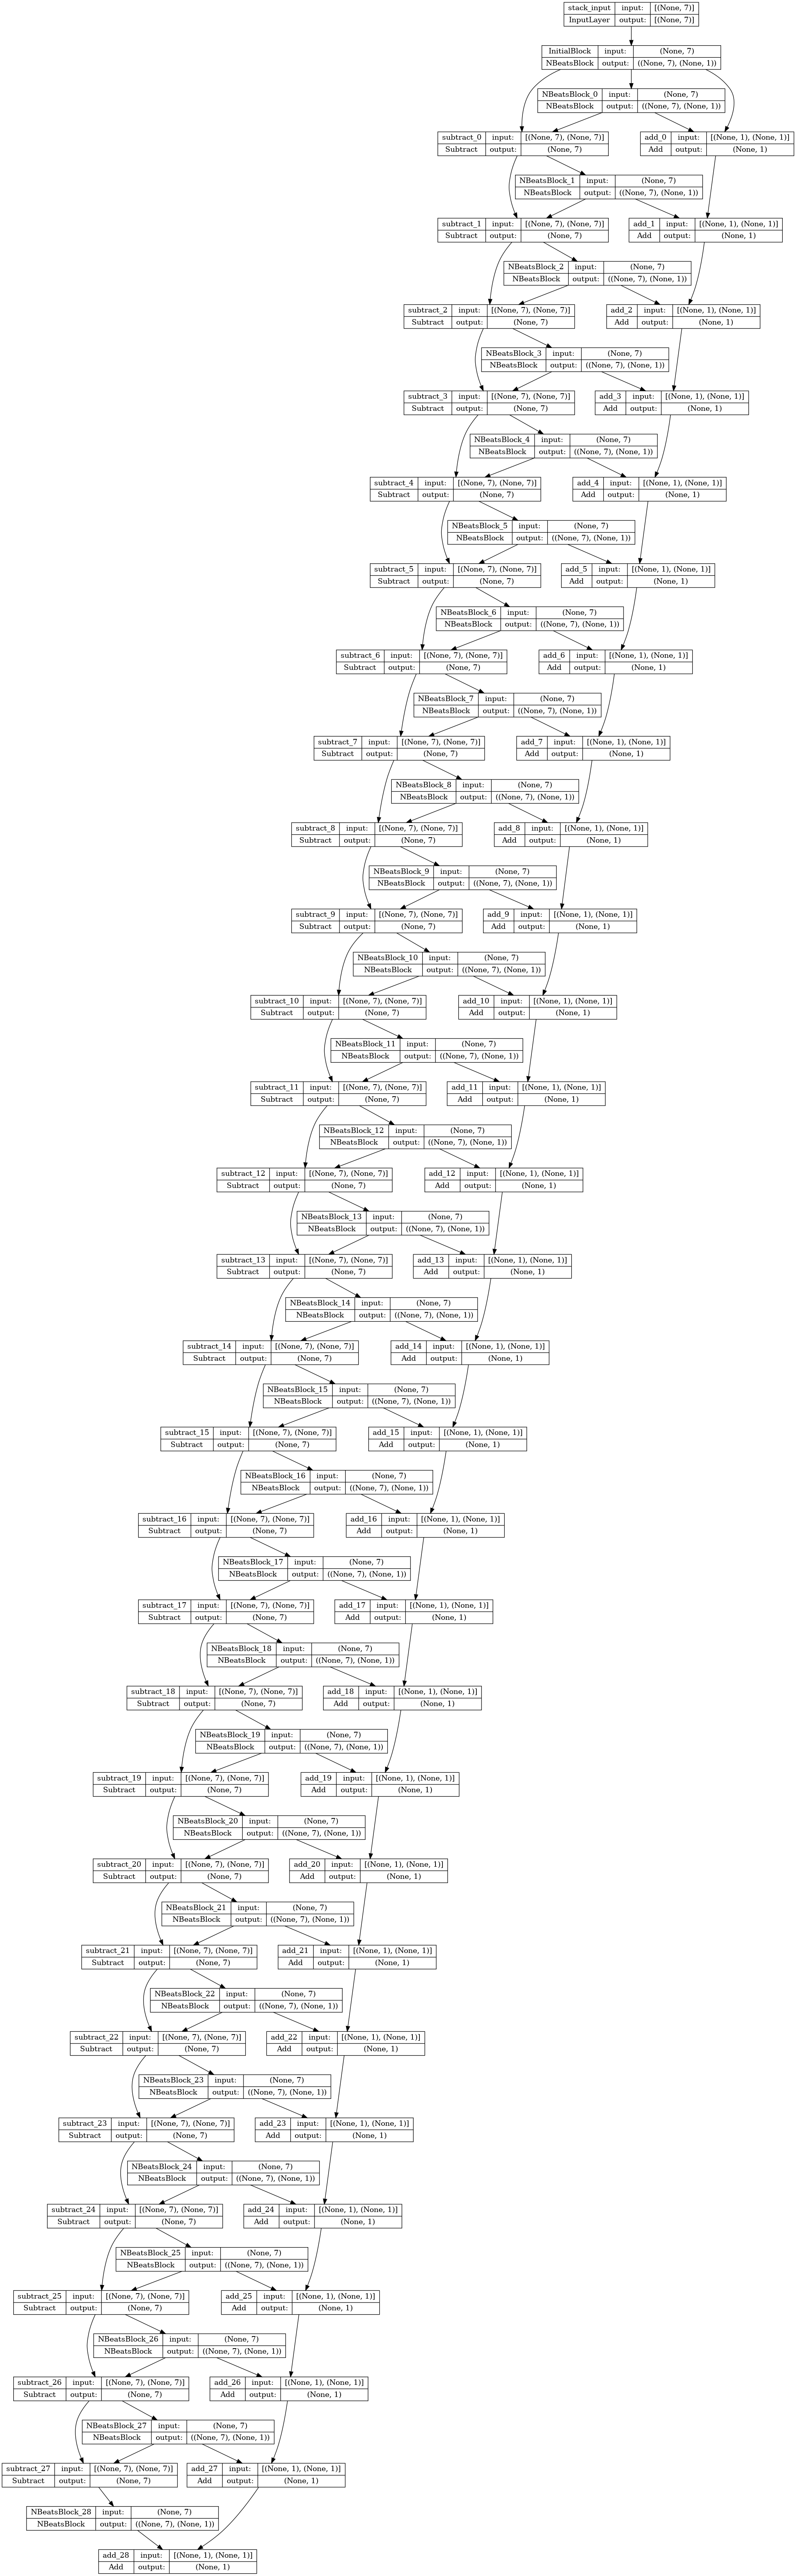

In [82]:
# plot 
from tensorflow.keras.utils import plot_model
plot_model(model_7, show_shapes=True)

### Model 8 - Ensemble

In [83]:
def get_ensemble_models(horizon=HORIZON, train_data=train_dataset, test_data=test_dataset, num_iter=10,
                        num_epochs=1000, loss_fns=['mae','mse','mape']):
    ensemble_models=[]
    for i in range(num_iter):
        for loss_function in loss_fns:
            print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model_number:{i}")
            model = tf.keras.models.Sequential([
                tf.keras.layers.Dense(128, activation=tf.keras.activations.relu, kernel_initializer='he_normal'),
                tf.keras.layers.Dense(128, activation=tf.keras.activations.relu, kernel_initializer='he_normal'),
                tf.keras.layers.Dense(HORIZON, activation=tf.keras.activations.linear)
            ])
            model.compile(loss=loss_function,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae','mse'])
            model.fit(train_data,
                      epochs=num_epochs,
                      validation_data=test_data,
                      verbose=0,
                      callbacks=[tf.keras.callbacks.EarlyStopping(patience=200, restore_best_weights=True),
                                 tf.keras.callbacks.ReduceLROnPlateau(patience=100, verbose=1)])
            ensemble_models.append(model)
    return ensemble_models

In [84]:
%%time
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model_number:0
Optimizing model by reducing: mse for 1000 epochs, model_number:0

Epoch 347: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 447: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model_number:0

Epoch 146: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 771: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 871: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model_number:1

Epoch 799: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 899: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model_number:1

Epoch 345: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 445: ReduceLROnPlateau

In [85]:
len(ensemble_models), ensemble_models

(15,
  <keras.src.engine.sequential.Sequential at 0x7fef567e4760>])

In [86]:
# make predictions with ensemble_models
def make_ensemble_preds(emsemble_models, data):
    ensemble_preds=[]
    for model in ensemble_models:
        preds=model.predict(data)
        ensemble_preds.append(preds)
    return tf.constant(tf.squeeze(ensemble_preds))
ensemble_preds = make_ensemble_preds(ensemble_models, test_dataset)
ensemble_preds

1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 26ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8710.213,  8697.935,  8947.456, ..., 49187.21 , 48093.58 ,
        44866.055],
       [ 8778.146,  8796.327,  9045.189, ..., 49737.344, 47942.438,
        45422.18 ],
       [ 8798.45 ,  8791.637,  9073.543, ..., 49923.633, 48385.78 ,
        45878.31 ],
       ...,
       [ 8885.243,  8843.88 ,  9127.067, ..., 50038.918, 49050.688,
        46544.203],
       [ 8805.288,  8762.752,  9101.409, ..., 49651.21 , 48358.723,
        45588.98 ],
       [ 8829.393,  8729.912,  9057.765, ..., 49776.465, 48927.7  ,
        45797.496]], dtype=float32)>

In [87]:
model_8_results = evaluate_preds(y_test, ensemble_preds)
model_8_results

{'mae': 584.93256,
 'mse': 1191000.2,
 'rmse': 1091.1052,
 'mape': 2.6712902,
 'mase': 1.0275644}

In [88]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8793.35  ,  8785.593 ,  9072.647 ,  8719.232 ,  8728.22  ,
        8730.198 ,  8664.11  ,  8470.669 ,  8463.698 ,  8523.449 ,
        8198.822 ,  8099.9917,  8066.742 ,  7632.1377,  7278.8564,
        7297.911 ,  7076.0044,  7208.1714,  7106.696 ,  7531.165 ,
        7383.223 ,  7751.2197,  7560.329 ,  7394.364 ,  7312.6987,
        7326.8496,  7200.834 ,  7388.2373,  7512.655 ,  7537.6113,
        7540.611 ,  7329.184 ,  7232.8994,  7187.5845,  7189.0356,
        7228.1562,  7081.717 ,  7094.752 ,  6871.242 ,  6590.203 ,
        7393.0767,  7168.3438,  7139.5454,  7239.417 ,  7295.8916,
        7174.6807,  7218.3267,  7213.564 ,  7171.5347,  7210.217 ,
        7309.562 ,  7382.63  ,  7238.2783,  7165.0156,  7163.079 ,
        6951.0234,  7269.8047,  7341.2754,  7356.547 ,  7707.072 ,
        8084.137 ,  8138.3643,  7842.3457,  8093.1196,  8111.289 ,
        8155.872 ,  8091.357 ,  8752.314 ,  8895.188 ,  8765.041 ,
        8927.0

In [89]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median

array([ 8800.541 ,  8798.051 ,  9082.935 ,  8713.505 ,  8749.125 ,
        8736.562 ,  8672.782 ,  8481.731 ,  8468.988 ,  8524.906 ,
        8200.447 ,  8108.7744,  8072.2866,  7629.7017,  7282.1787,
        7311.664 ,  7077.069 ,  7205.312 ,  7110.055 ,  7521.8325,
        7373.1743,  7745.3   ,  7556.0854,  7395.0137,  7326.2065,
        7322.0015,  7207.794 ,  7389.871 ,  7510.441 ,  7540.692 ,
        7545.625 ,  7329.5244,  7233.91  ,  7191.0503,  7189.847 ,
        7233.9424,  7078.7944,  7098.538 ,  6871.606 ,  6587.0312,
        7404.3877,  7124.801 ,  7147.237 ,  7247.6074,  7283.726 ,
        7185.0825,  7223.276 ,  7212.4453,  7183.677 ,  7217.651 ,
        7307.549 ,  7383.594 ,  7245.0576,  7165.127 ,  7162.6357,
        6960.158 ,  7282.139 ,  7344.877 ,  7357.427 ,  7715.6978,
        8078.3765,  8141.8457,  7836.846 ,  8087.3774,  8107.608 ,
        8168.7886,  8094.1714,  8741.564 ,  8887.959 ,  8763.466 ,
        8924.433 ,  8968.979 ,  8659.668 ,  8632.932 ,  8709.7

In [90]:
model_8_results_mean = evaluate_preds(y_test, ensemble_mean)
model_8_results_median = evaluate_preds(y_test, ensemble_median)
pd.DataFrame({"model_8_results":model_8_results,
              "model_8_results_mean":model_8_results_mean,
              "model_8_results_median":model_8_results_median}).T

,mae,mse,rmse,mape,mase
model_8_results,584.932556,1191000.250,1091.105225,2.671290,1.027564
model_8_results_mean,571.322327,1151786.625,1073.213257,2.591402,1.003655
model_8_results_median,571.311890,1157011.250,1075.644531,2.587326,1.003637


#### Plotting prediction intervals (uncertainity estimates) of ensemble

In [91]:
# FInd upper and lower bound of ensemble predicions
def get_upper_lower(preds):
    std = tf.math.reduce_std(preds, axis=0)
    interval = std*1.96
    preds_mean = tf.reduce_mean(preds, axis=0)
    lower, upper = preds_mean-interval, preds_mean+interval
    return lower, upper

lower, upper = get_upper_lower(ensemble_preds)
lower[:5], upper[:5]

(<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8708.002, 8694.028, 8986.931, 8614.526, 8612.155], dtype=float32)>,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=array([8878.697, 8877.157, 9158.364, 8823.938, 8844.284], dtype=float32)>)

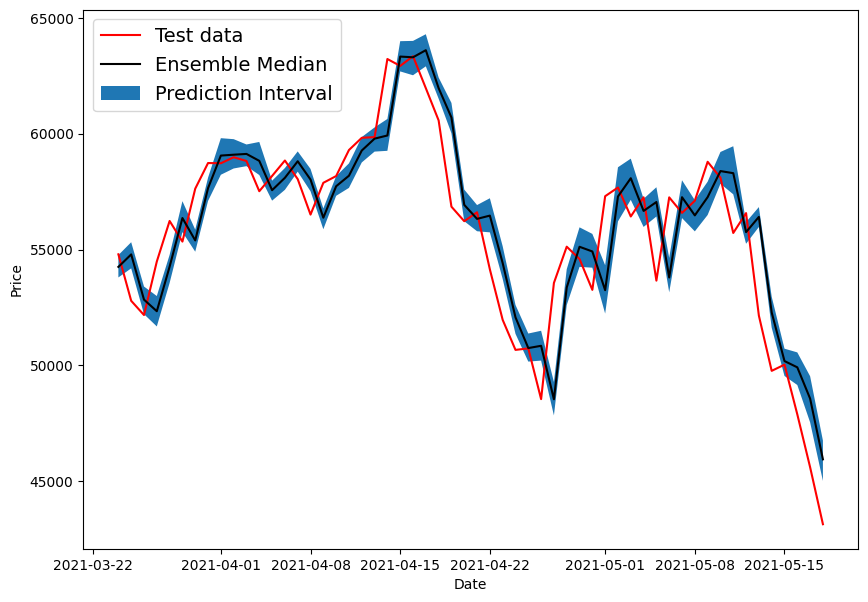

In [92]:
ensemble_median = np.median(ensemble_preds, axis=0)

#plot interval predictions
offset=500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:], y_test[offset:], "r", label="Test data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], 'k-', label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("Price")
plt.fill_between(X_test.index[offset:],
                lower[offset:],
                upper[offset:], label='Prediction Interval')
plt.legend(loc='upper left', fontsize=14)

#### Model 9 - Future prediction model

In [93]:
X_all = bitcoin_prices_windowed.dropna().drop(["Price","block_reward"], axis=1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all)).batch(1024).prefetch(tf.data.AUTOTUNE)

tf.random.set_seed(42)
model_9 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
], name='model_9_dense_7_1')

model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

history_9 = model_9.fit(dataset_all,
                        epochs=100,
                        verbose=0)

In [94]:
# make prediction
INTO_FUTURE = 14

def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE):
    future_forecast=[]
    last_window = values[-window_size:]
    for _ in range(into_future):
        future_pred = model.predict(tf.expand_dims(last_window, axis=0))
        print(f"Predicting on : {last_window} -> Prediciton : {tf.squeeze(future_pred).numpy()}\n")
        future_forecast.append(tf.squeeze(future_pred).numpy())
        last_window = np.append(last_window, future_pred)[-window_size:]
    return future_forecast

future_forecast = make_future_forecasts(y_all, model_9, 14, 7)

1/1 [==============================] - 0s 44ms/step
Predicting on : [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediciton : 56209.140625

1/1 [==============================] - 0s 20ms/step
Predicting on : [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 56209.140625  ] -> Prediciton : 51622.16015625

1/1 [==============================] - 0s 26ms/step
Predicting on : [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 56209.140625   51622.16015625] -> Prediciton : 49190.9609375

1/1 [==============================] - 0s 18ms/step
Predicting on : [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 56209.140625   51622.16015625 49190.9609375 ] -> Prediciton : 49333.98046875

1/1 [==============================] - 0s 19ms/step
Predicting on : [47885.62525472 45604.61575361 43144.47129086 56209.140625
 51622.16015625 49190.9609375  49333.9804687

In [95]:
future_forecast

[56209.14,
 51622.16,
 49190.96,
 49333.98,
 47291.492,
 46678.465,
 46917.21,
 55531.844,
 50838.96,
 48565.53,
 49080.145,
 47523.973,
 48070.445,
 49421.69]

In [96]:
def get_future_dates(start_date, into_future, offset=1):
    start_date = start_date + np.timedelta64(offset, "D")
    end_date = start_date + np.timedelta64(into_future, "D")
    return np.arange(start_date, end_date, dtype='datetime64[D]')

last_timestep = bitcoin_prices.index[-1]
next_timesteps = get_future_dates(start_date = last_timestep,
                                  into_future=INTO_FUTURE)
next_timesteps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

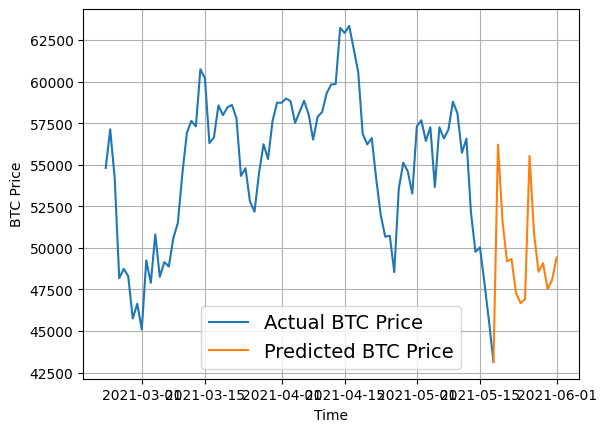

In [97]:
next_timesteps = np.insert(next_timesteps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, prices[-1])
plt.figure()
plot_time_series(bitcoin_prices.index, prices, start=2700, format='-', label='Actual BTC Price')
plot_time_series(next_timesteps, future_forecast, format='-', label='Predicted BTC Price')

### Turkey model

In [98]:
# let us introduce turkey problem into our data
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

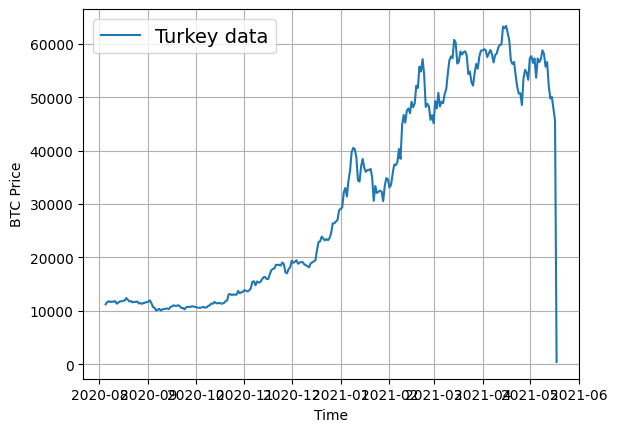

In [99]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
plot_time_series(btc_timesteps_turkey, btc_price_turkey, format='-', label='Turkey data', start=2500)

In [100]:
# create train_test sets
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=7, horizon=1)
X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
model_10 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
], name='model_10_7_1')
model_10.compile(loss='mae',
                 optimizer=tf.keras.optimizers.Adam())
history_10 = model_10.fit(X_train, y_train,
                          epochs=100,
                         verbose=0,
                         batch_size=128,
                         validation_data=(X_test, y_test),
                         callbacks=create_model_checkpoint(model_10.name))

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(7, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef5674cf10>, 140665924212176), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566e5400>, 140665924212096), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566ed3a0>, 140665924256112), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fef566fd310>, 140665924256032), {}).


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_10_7_1/assets


In [101]:
model_10.evaluate(X_test, y_test)

18/18 [==============================] - 0s 887us/step - loss: 711.6357


711.6356811523438

In [102]:
model_10 = tf.keras.models.load_model("10_model_experiments/"+model_10.name)
model_10.evaluate(X_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 639.6212


639.6211547851562

In [103]:
model_10_preds = make_preds(model_10, X_test)
model_10_results = evaluate_preds(y_test, model_10_preds)
model_10_results

18/18 [==============================] - 0s 776us/step


{'mae': 17125.557,
 'mse': 614154430.0,
 'rmse': 23707.342,
 'mape': 121.317154,
 'mase': 26.501854}

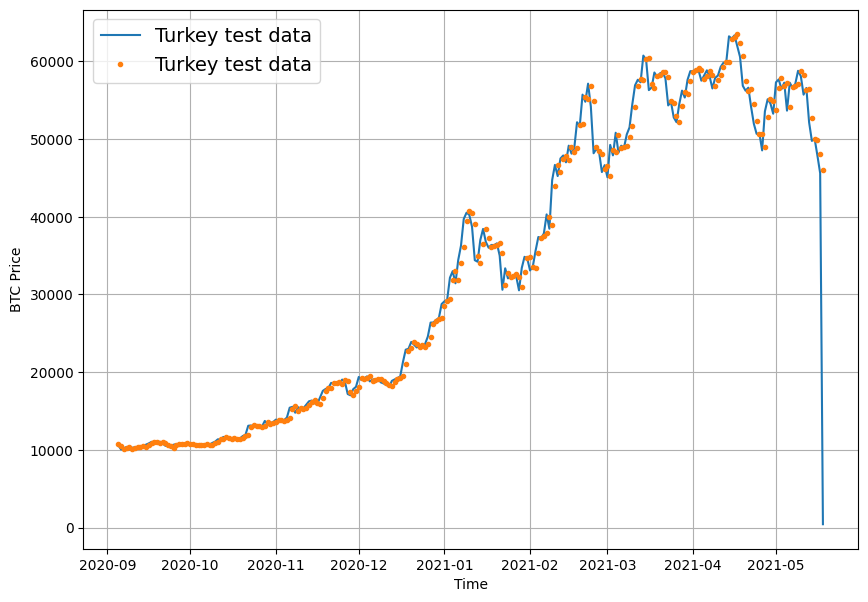

In [104]:
plt.figure(figsize=(10,7))
plot_time_series(btc_timesteps_turkey[-len(X_test):], btc_price_turkey[-len(y_test):], format='-', label='Turkey test data', start=300)
plot_time_series(btc_timesteps_turkey[-len(X_test):], model_10_preds, label='Turkey test data', start=300)

## Compare all models

In [105]:
model_results = pd.DataFrame({"naive":model_0_results,
              "model_1_7_1":model_1_results,
              "model_2_30_7":model_2_results,
              "model_3_30_7":model_3_results,
              "model_4_COnv1d":model_4_results,
              "model_5_LSTM":model_5_results,
              "model_6_multivariate":model_6_results,
              "model_7_NBEATS":model_7_results,
              "model_8_ensemble":model_8_results,
              "model_10_turkey":model_10_results}).T
model_results

,mae,mse,rmse,mape,mase
naive,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_7_1,567.158020,1.163890e+06,1078.837280,2.528330,0.996340
model_2_30_7,596.939514,1.250916e+06,1118.443481,2.689183,1.043456
model_3_30_7,1228.275024,5.277506e+06,1415.009521,5.578101,2.185647
model_4_COnv1d,572.336304,1.183413e+06,1087.848022,2.551474,1.005436
model_5_LSTM,604.142822,1.297693e+06,1139.163330,2.728626,1.061312
model_6_multivariate,566.044678,1.153240e+06,1073.890015,2.541721,0.994384
model_7_NBEATS,574.481079,1.180058e+06,1086.304443,2.671887,1.009204
model_8_ensemble,584.932556,1.191000e+06,1091.105225,2.671290,1.027564
model_10_turkey,17125.556641,6.141544e+08,23707.341797,121.317154,26.501854


<Axes: >

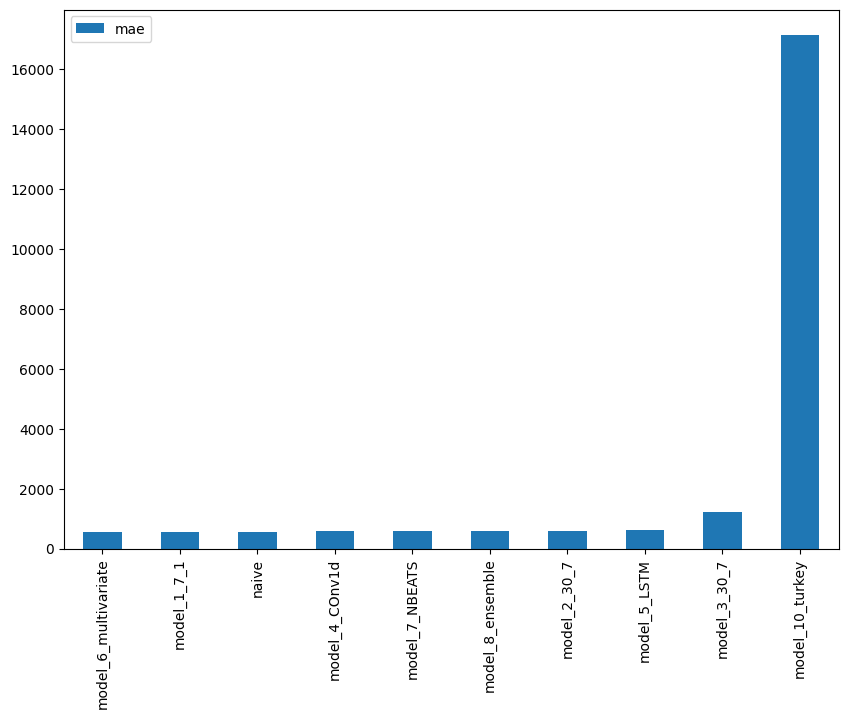

In [106]:
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10,7), kind='bar')

# EXERCISE

In [107]:
#1. Does scaling the data help for univariate/multivariate data? (e.g. getting all of the values between 0 & 1)
# scale the prices
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
prices_norm = tf.squeeze(scaler.fit_transform(prices.reshape(-1,1))).numpy()
full_windows_norm, full_labels_norm = make_windows(prices_norm)
train_windows_norm, test_windows_norm, train_labels_norm, test_labels_norm = make_train_test_splits(full_windows_norm, full_labels_norm)
model_1_norm = tf.keras.models.clone_model(model_1)
model_1_norm._name="model_1_norm"
model_1_norm.compile(loss='mae',
                     optimizer=tf.keras.optimizers.Adam())
history_1_norm = model_1_norm.fit(train_windows_norm, train_labels_norm,
                                  epochs=100,
                                  batch_size=128,
                                  validation_data=(test_windows_norm, test_labels_norm),
                                  callbacks=create_model_checkpoint(model_1_norm.name))

Epoch 1/100
 1/18 [>.............................] - ETA: 6s - loss: 0.0634INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 1s 19ms/step - loss: 0.0251 - val_loss: 0.0258
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0058 - val_loss: 0.0417
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0273
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0031INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 12ms/step - loss: 0.0026 - val_loss: 0.0192
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0024INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 13ms/step - loss: 0.0024 - val_loss: 0.0188
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0188
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0029INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 14ms/step - loss: 0.0023 - val_loss: 0.0164
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0020INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 14ms/step - loss: 0.0023 - val_loss: 0.0162
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0184
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0166
Epoch 11/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0185
Epoch 12/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0187
Epoch 13/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0171
Epoch 14/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0174
Epoch 15/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0184
Epoch 16/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0174
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0018INFO:tensorflow:Assets written to: 10

INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 14ms/step - loss: 0.0023 - val_loss: 0.0158
Epoch 18/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0170
Epoch 19/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0174
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0022INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 14ms/step - loss: 0.0021 - val_loss: 0.0141
Epoch 21/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0150
Epoch 22/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0157
Epoch 23/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0143
Epoch 24/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0166
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0026INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 14ms/step - loss: 0.0020 - val_loss: 0.0126
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0020INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 15ms/step - loss: 0.0021 - val_loss: 0.0125
Epoch 27/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0136
Epoch 28/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0161
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0155
Epoch 30/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0146
Epoch 31/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0159
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0135
Epoch 33/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0137
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0142
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0138
Epoch 36/100

INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 13ms/step - loss: 0.0019 - val_loss: 0.0122
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0022INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 14ms/step - loss: 0.0019 - val_loss: 0.0120
Epoch 40/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0143
Epoch 41/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0121
Epoch 42/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0127
Epoch 43/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0144
Epoch 44/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0142
Epoch 45/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0140
Epoch 46/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0181
Epoch 47/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0173
Epoch 48/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0131
Epoch 49/100

INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 13ms/step - loss: 0.0022 - val_loss: 0.0114
Epoch 51/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0129
Epoch 52/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0137
Epoch 53/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0130
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0018INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 13ms/step - loss: 0.0019 - val_loss: 0.0112
Epoch 55/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0121
Epoch 56/100
 1/18 [>.............................] - ETA: 0s - loss: 0.0018INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_1_norm/assets


18/18 [==============================] - 0s 14ms/step - loss: 0.0019 - val_loss: 0.0109
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0132
Epoch 58/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0122
Epoch 59/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0117
Epoch 60/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0151
Epoch 61/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0152
Epoch 62/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0114
Epoch 63/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0181
Epoch 64/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0197
Epoch 65/100
18/18 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0130
Epoch 66/100

In [108]:
model_1_norm.evaluate(test_windows_norm, test_labels_norm)

18/18 [==============================] - 0s 996us/step - loss: 0.0178


0.017778532579541206

In [109]:
model_1_norm = tf.keras.models.load_model("10_model_experiments/"+model_1_norm.name)
model_1_norm.evaluate(test_windows_norm, test_labels_norm)
model_1_norm_preds = make_preds(model_1_norm, test_windows)
model_1_norm_results = evaluate_preds(tf.squeeze(test_labels), model_1_norm_preds)
model_1_norm_results, model_1_results

18/18 [==============================] - 0s 853us/step


({'mae': 985.93445,
  'mse': 2485063.0,
  'rmse': 1576.4083,
  'mape': 4.728925,
  'mase': 1.7320137},
 {'mae': 567.158,
  'mse': 1163890.0,
  'rmse': 1078.8373,
  'mape': 2.5283296,
  'mase': 0.99633956})

In [110]:
#model_6 -norm data
scaled_price_block = scaled_price_block_df.copy() 
for i in range(WINDOW_SIZE):
    scaled_price_block[f"Price+{i+1}"] = scaled_price_block["Price"].shift(i+1)
X = scaled_price_block.dropna().drop('Price', axis=1).to_numpy()
y = scaled_price_block.dropna()["Price"].to_numpy()
split_size=int(0.8*len(X))
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size: ], y[split_size:]

train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)
test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset)).batch(1024).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset)).batch(1024).prefetch(tf.data.AUTOTUNE)

model_6_norm = tf.keras.models.clone_model(model_6)
model_6_norm._name='model_6_norm'
model_6_norm.compile(loss='mae',
                     optimizer=tf.keras.optimizers.Adam())
history_6_norm = model_6_norm.fit(train_dataset,
                                  epochs=100,
                                  validation_data=test_dataset,
                                  callbacks=create_model_checkpoint(model_6_norm.name))
model_6_norm = tf.keras.models.load_model("10_model_experiments/"+model_6_norm.name)
model_6_norm.evaluate(X_test, y_test)
model_6_norm_preds = model_6_norm.predict(X_test)
model_6_norm_results = evaluate_preds(y_test, tf.squeeze(model_6_norm_preds))
model_6_norm_results

Epoch 1/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0306INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 1s 112ms/step - loss: 0.0355 - val_loss: 0.1919
Epoch 2/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0299INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 97ms/step - loss: 0.0261 - val_loss: 0.1496
Epoch 3/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0412INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 97ms/step - loss: 0.0312 - val_loss: 0.1252
Epoch 4/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0324INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 106ms/step - loss: 0.0262 - val_loss: 0.1130
Epoch 5/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0086INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 105ms/step - loss: 0.0103 - val_loss: 0.1095
Epoch 6/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0228INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 99ms/step - loss: 0.0145 - val_loss: 0.0952
Epoch 7/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0290INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 93ms/step - loss: 0.0170 - val_loss: 0.0821
Epoch 8/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0215INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 97ms/step - loss: 0.0157 - val_loss: 0.0815
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0120 - val_loss: 0.0892
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0075 - val_loss: 0.1010
Epoch 11/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0063 - val_loss: 0.1118
Epoch 12/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0052 - val_loss: 0.1034
Epoch 13/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0085 - val_loss: 0.0944
Epoch 14/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0900
Epoch 15/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0050 - val_loss: 0.0851
Epoch 16/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0056 - val_loss: 0.0833
Epoch 17/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0036 - val_loss: 0.0864
Epoch 18/100
3/3 [===============

INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 99ms/step - loss: 0.0069 - val_loss: 0.0797
Epoch 23/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0805
Epoch 24/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0069 - val_loss: 0.0902
Epoch 25/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0050 - val_loss: 0.0931
Epoch 26/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0068 - val_loss: 0.0816
Epoch 27/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0053 - val_loss: 0.0809
Epoch 28/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0034 - val_loss: 0.0855
Epoch 29/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0030 - val_loss: 0.0890
Epoch 30/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0039 - val_loss: 0.0871
Epoch 31/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0037 - val_loss: 0.0830
Epoch 32/100
3/3 [==============

INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 93ms/step - loss: 0.0041 - val_loss: 0.0795
Epoch 42/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.0829
Epoch 43/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0807
Epoch 44/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0036 - val_loss: 0.0811
Epoch 45/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0039 - val_loss: 0.0804
Epoch 46/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0041 - val_loss: 0.0833
Epoch 47/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0040 - val_loss: 0.0796
Epoch 48/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0047 - val_loss: 0.0818
Epoch 49/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0037 - val_loss: 0.0797
Epoch 50/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0042 - val_loss: 0.0803
Epoch 51/100
1/3 [=========>....

INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 102ms/step - loss: 0.0039 - val_loss: 0.0778
Epoch 52/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0040 - val_loss: 0.0802
Epoch 53/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0034INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 99ms/step - loss: 0.0042 - val_loss: 0.0773
Epoch 54/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0041 - val_loss: 0.0798
Epoch 55/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.0777
Epoch 56/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0040 - val_loss: 0.0797
Epoch 57/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0029INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 94ms/step - loss: 0.0039 - val_loss: 0.0771
Epoch 58/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0042 - val_loss: 0.0795
Epoch 59/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0031INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 103ms/step - loss: 0.0040 - val_loss: 0.0768
Epoch 60/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0040 - val_loss: 0.0787
Epoch 61/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0031INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 94ms/step - loss: 0.0040 - val_loss: 0.0760
Epoch 62/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0040 - val_loss: 0.0782
Epoch 63/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0032INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 93ms/step - loss: 0.0040 - val_loss: 0.0753
Epoch 64/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0040 - val_loss: 0.0777
Epoch 65/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0033INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 89ms/step - loss: 0.0041 - val_loss: 0.0751
Epoch 66/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0039 - val_loss: 0.0770
Epoch 67/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0031INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 97ms/step - loss: 0.0039 - val_loss: 0.0746
Epoch 68/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0039 - val_loss: 0.0769
Epoch 69/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0033INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 96ms/step - loss: 0.0040 - val_loss: 0.0737
Epoch 70/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0039 - val_loss: 0.0763
Epoch 71/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0034INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 108ms/step - loss: 0.0041 - val_loss: 0.0735
Epoch 72/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0038 - val_loss: 0.0758
Epoch 73/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0033INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 1s 326ms/step - loss: 0.0040 - val_loss: 0.0734
Epoch 74/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0038 - val_loss: 0.0757
Epoch 75/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0032INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 92ms/step - loss: 0.0039 - val_loss: 0.0730
Epoch 76/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0039 - val_loss: 0.0752
Epoch 77/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0033INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 94ms/step - loss: 0.0040 - val_loss: 0.0726
Epoch 78/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0038 - val_loss: 0.0748
Epoch 79/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0034INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 99ms/step - loss: 0.0040 - val_loss: 0.0723
Epoch 80/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0037 - val_loss: 0.0750
Epoch 81/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0040 - val_loss: 0.0724
Epoch 82/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0039 - val_loss: 0.0749
Epoch 83/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0039 - val_loss: 0.0724
Epoch 84/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0038 - val_loss: 0.0749
Epoch 85/100
1/3 [=========>....................] - ETA: 0s - loss: 0.0033INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


INFO:tensorflow:Assets written to: 10_model_experiments/model_6_norm/assets


3/3 [==============================] - 0s 96ms/step - loss: 0.0039 - val_loss: 0.0722
Epoch 86/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0038 - val_loss: 0.0751
Epoch 87/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0039 - val_loss: 0.0724
Epoch 88/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0037 - val_loss: 0.0750
Epoch 89/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0724
Epoch 90/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.0749
Epoch 91/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0725
Epoch 92/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0037 - val_loss: 0.0753
Epoch 93/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0726
Epoch 94/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.0757
Epoch 95/100
3/3 [==============

{'mae': 0.07220149,
 'mse': 0.012955007,
 'rmse': 0.11382006,
 'mape': 16.969828,
 'mase': 8.021007}

In [111]:
model_6_results

{'mae': 566.0447,
 'mse': 1153239.8,
 'rmse': 1073.89,
 'mape': 2.5417213,
 'mase': 0.9943837}

Therefore normalizing the data doesnt improve the model, it worsen's it

In [112]:
# 2 For future predictions, try to make a prediction, retrain a model on the predictions, make a prediction, retrain a model, make a prediction, retrain a model, make a prediction (retrain a model each time a new prediction is made). Plot the results, how do they look compared to the future predictions where a model wasn't retrained for every forecast (model_9)?
def make_future_forecasts(train_data, values, model, into_future, window_size=WINDOW_SIZE):
    future_forecast=[]
    last_window = values[-window_size:]
    for _ in range(into_future):
        future_pred = model.predict(tf.expand_dims(last_window, axis=0))
        print(f"Predicting on : {last_window} -> Prediciton : {tf.squeeze(future_pred).numpy()}\n")
        future_forecast.append(tf.squeeze(future_pred).numpy())
        last_window = np.append(last_window, future_pred)[-window_size:]

        train_data = np.append(train_data, [last_window], axis=0)
        features_dataset_all = tf.data.Dataset.from_tensor_slices(train_data)
        labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)
        dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all)).batch(1024).prefetch(tf.data.AUTOTUNE)
        model.fit(dataset_all, epochs=100, verbose=0)
        
    return future_forecast

future_forecast = make_future_forecasts(X_all, y_all, model_9, 14, 7)

1/1 [==============================] - 0s 18ms/step
Predicting on : [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediciton : 56209.140625

1/1 [==============================] - 0s 17ms/step
Predicting on : [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 56209.140625  ] -> Prediciton : 51816.66015625

1/1 [==============================] - 0s 23ms/step
Predicting on : [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 56209.140625   51816.66015625] -> Prediciton : 49935.26953125

1/1 [==============================] - 0s 17ms/step
Predicting on : [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 56209.140625   51816.66015625 49935.26953125] -> Prediciton : 50103.22265625

1/1 [==============================] - 0s 16ms/step
Predicting on : [47885.62525472 45604.61575361 43144.47129086 56209.140625
 51816.66015625 49935.26953125 50103.222656

In [113]:
last_timestep = bitcoin_prices.index[-1]
next_timesteps = get_future_dates(start_date = last_timestep,
                                  into_future=INTO_FUTURE)
next_timesteps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

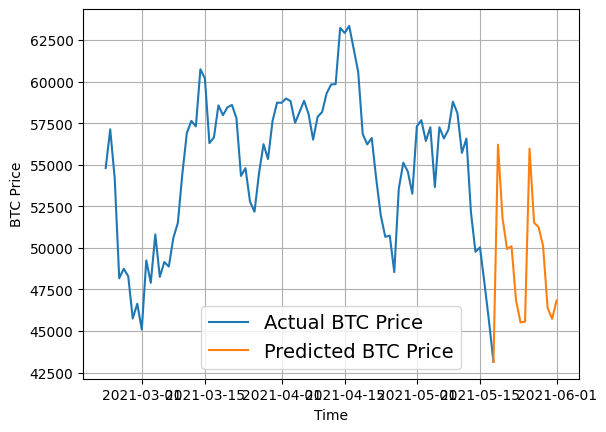

In [114]:
next_timesteps = np.insert(next_timesteps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, prices[-1])
plt.figure()
plot_time_series(bitcoin_prices.index, prices, start=2700, format='-', label='Actual BTC Price')
plot_time_series(next_timesteps, future_forecast, format='-', label='Predicted BTC Price')